<a href="https://www.kaggle.com/code/berrinkaradag/house-price-eda-ml?scriptVersionId=206602192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Case


**Business Problem:** Using a dataset of properties and house prices for each house, a machine learning project on the prices of different types of houses is intended to be realized.

This dataset of residential homes in Ames, Iowa contains 79 explanatory variables. A contest on Kaggle. You can access the dataset and the competition page of the project from the kaggle website. The dataset belongs to a kaggle competition, therefore, there are two different csv files, train and test. In the test dataset, house prices are left blank and this. We try expect to estimate the values.

38 Numeric Variables, 43 Categorical Variables, 1460 Observation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Preparing Data

In [3]:
df_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
df=pd.concat([df_train, df_test])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710         1.000         0.000         2         1             3   
1       1262         0.000         1.000         2         0             3   
2       1786         1.000         0.000         2         1             3   
3       1717         1.000         0.000         1         0             3   
4       2198         1.000         0.000         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())
    
check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2  

# Variables Analysis

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, car_th=25)

print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 2919
Variables: 81
cat_cols: 53
num_cols: 28
cat_but_car: 0
num_but_cat: 10
#############
Cat_Cols : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']
#############
Num_Cols : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtU

In [8]:
num_cols=[col for col in num_cols if col not in ["Id", "SalePrice"]]
df=df.apply(lambda x: x.astype(int) if x.dtypes=="bool" else x)

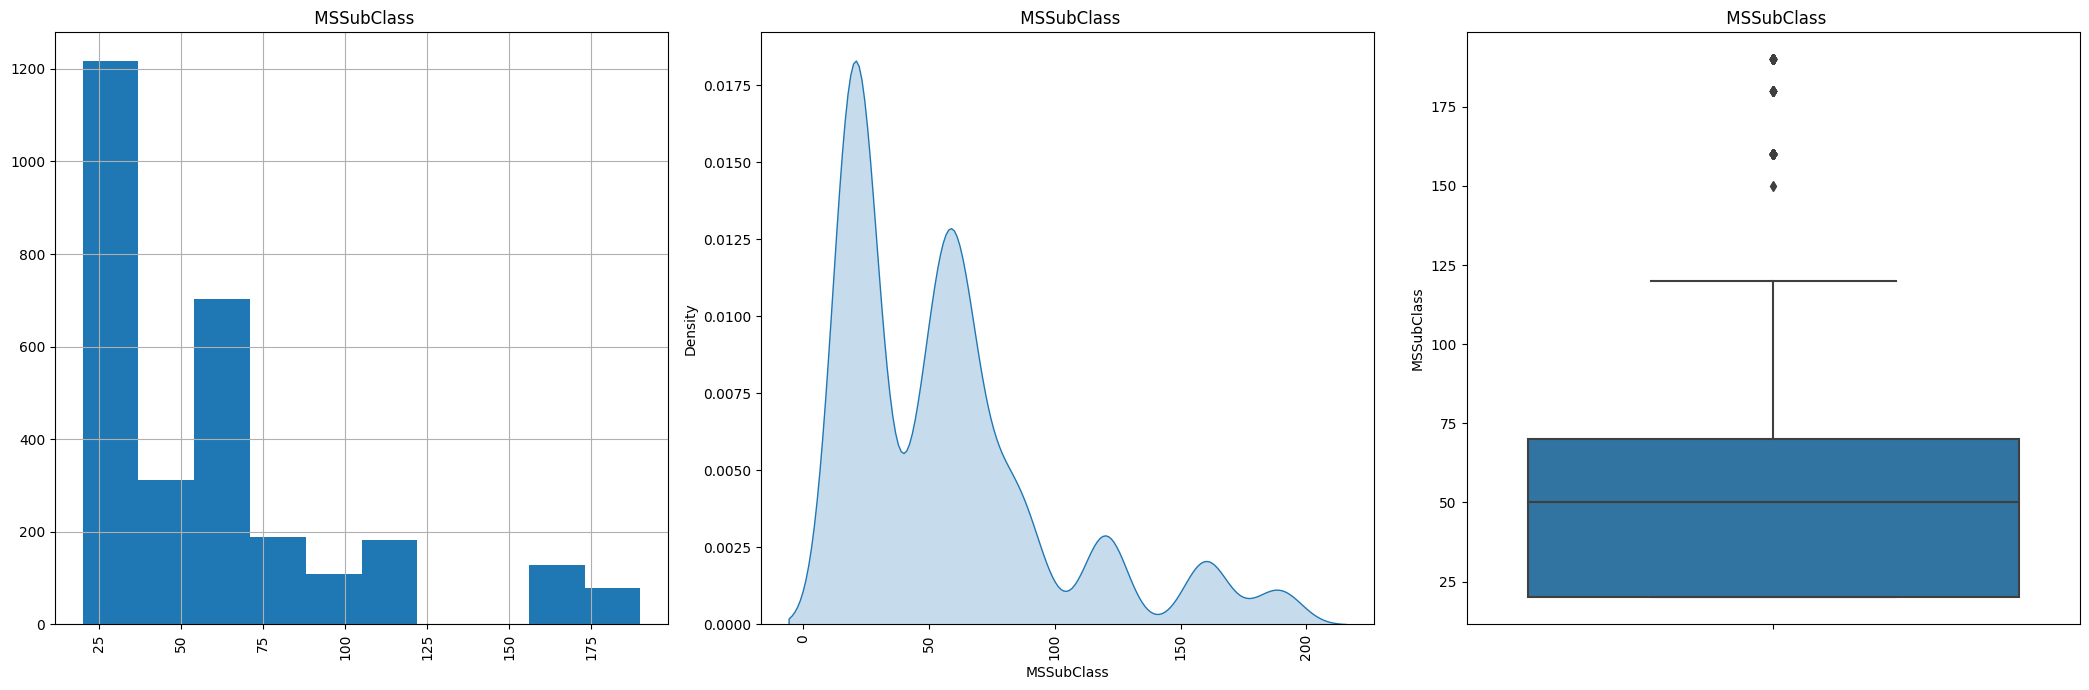

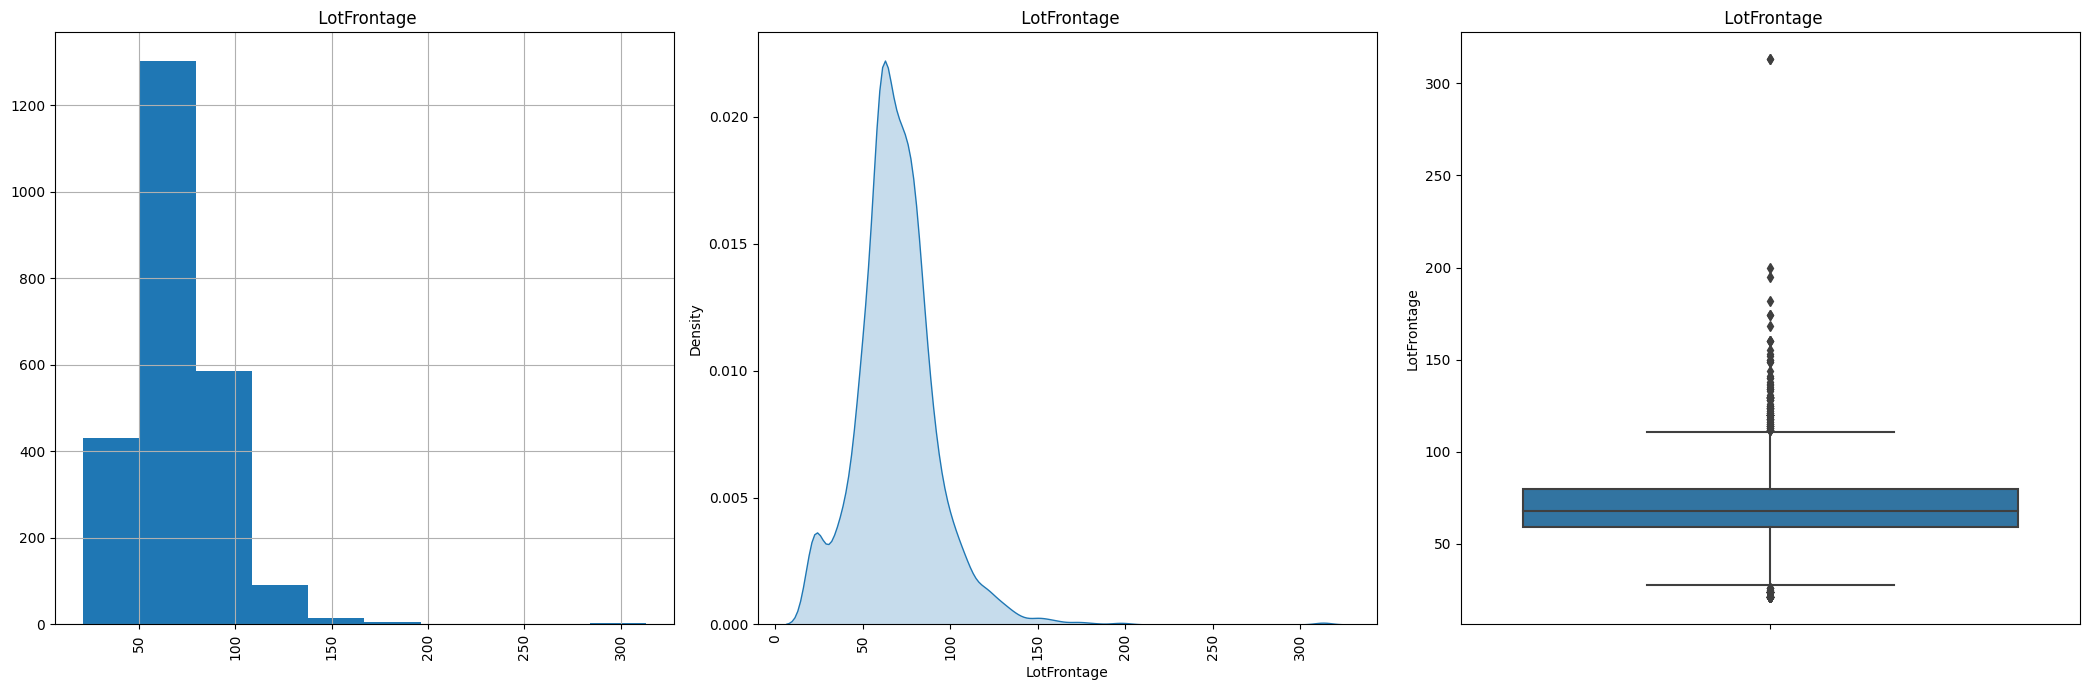

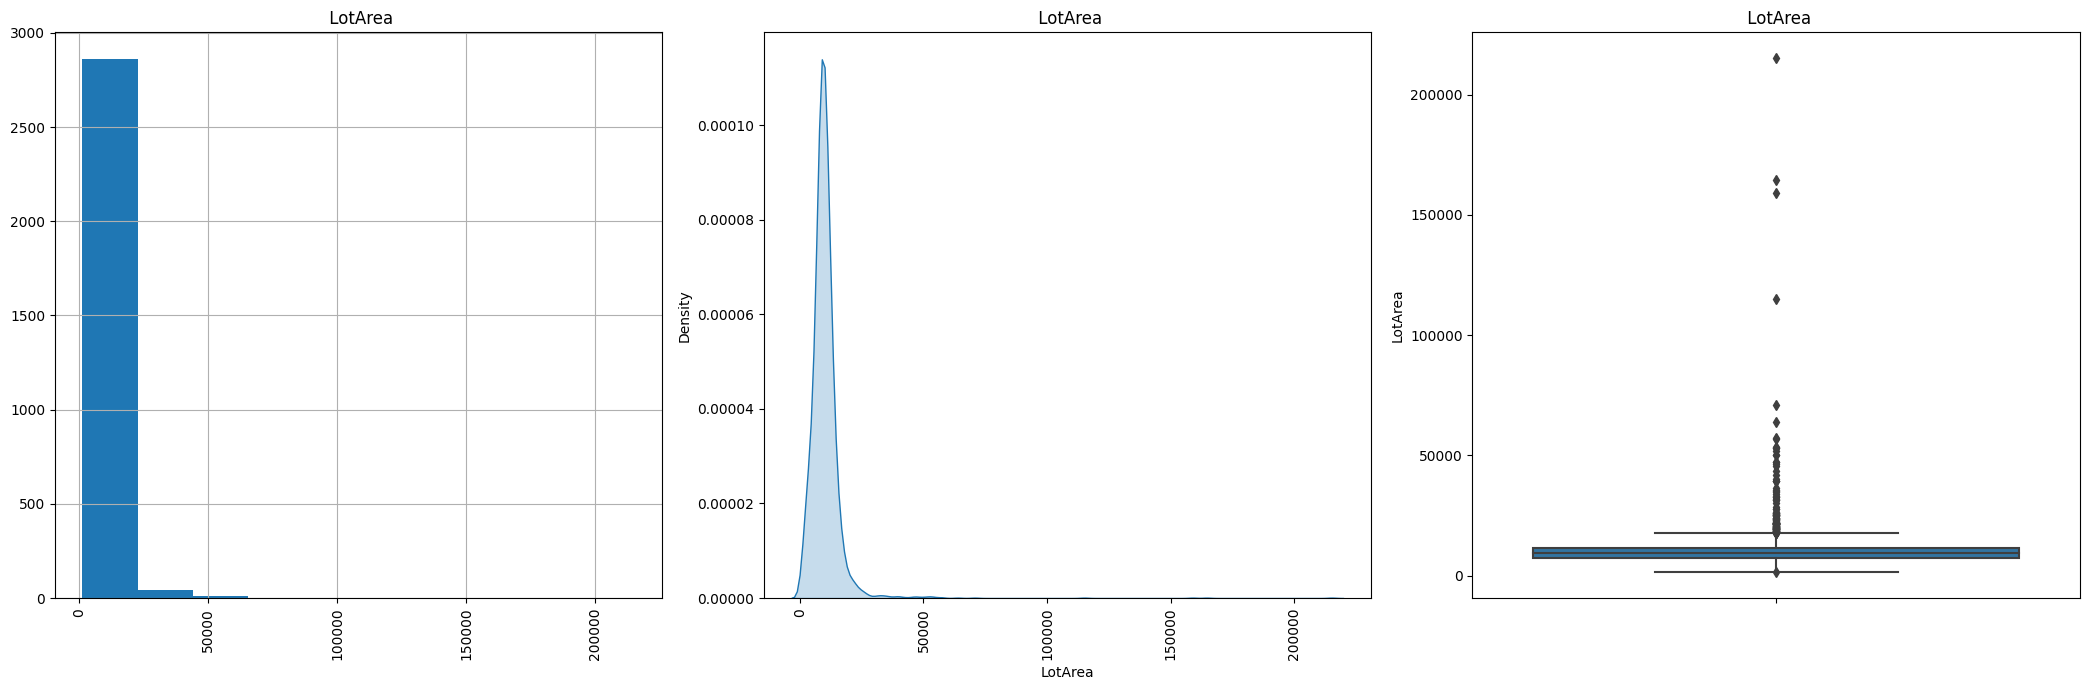

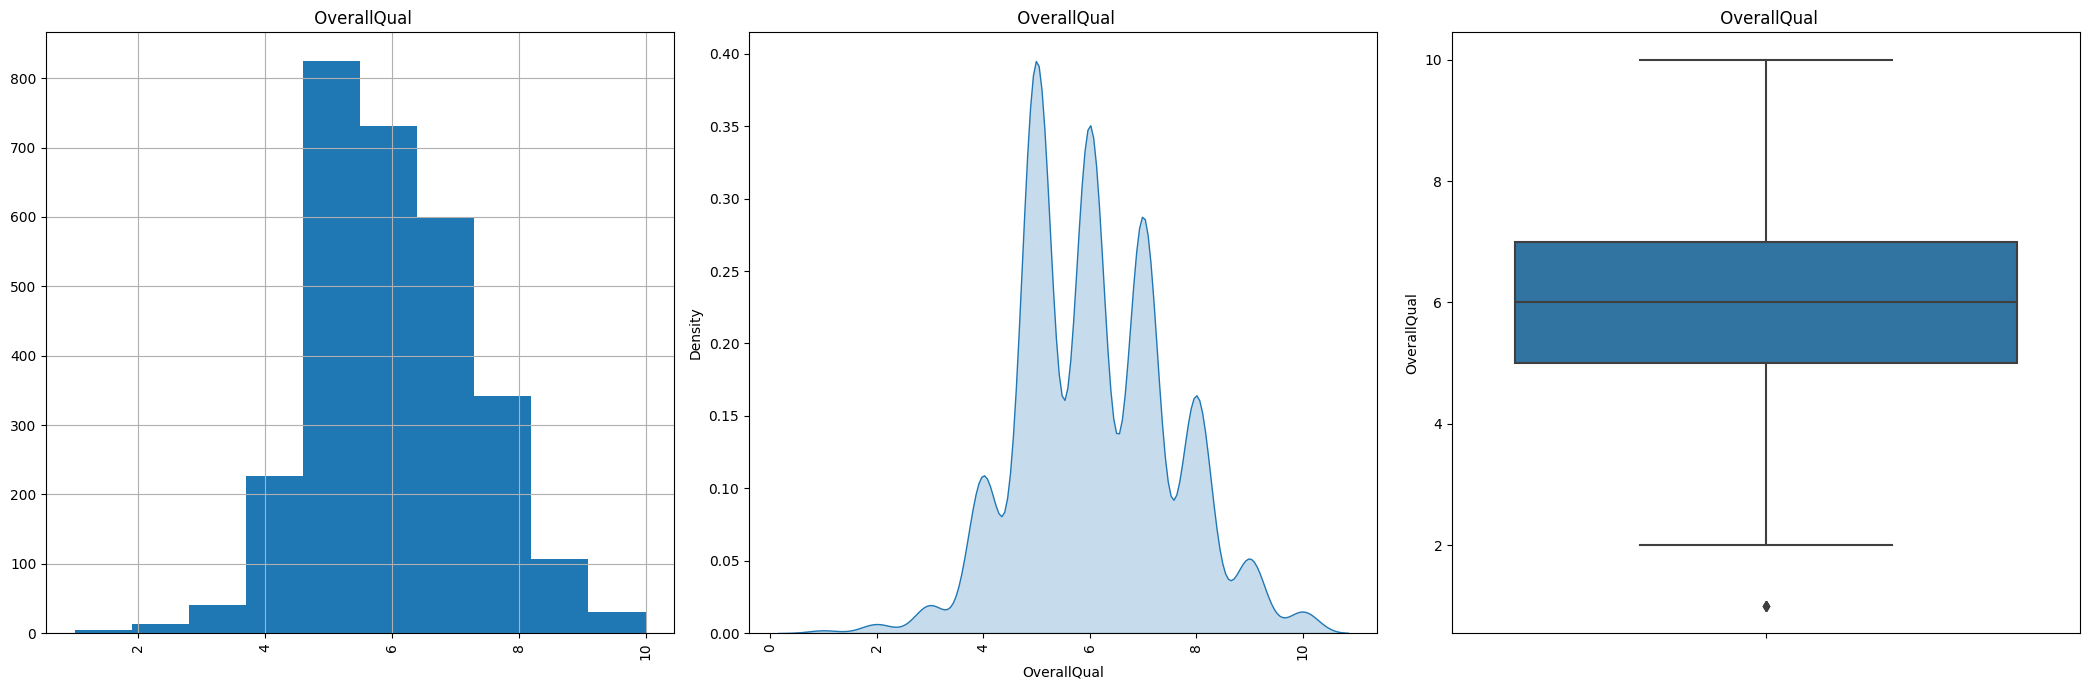

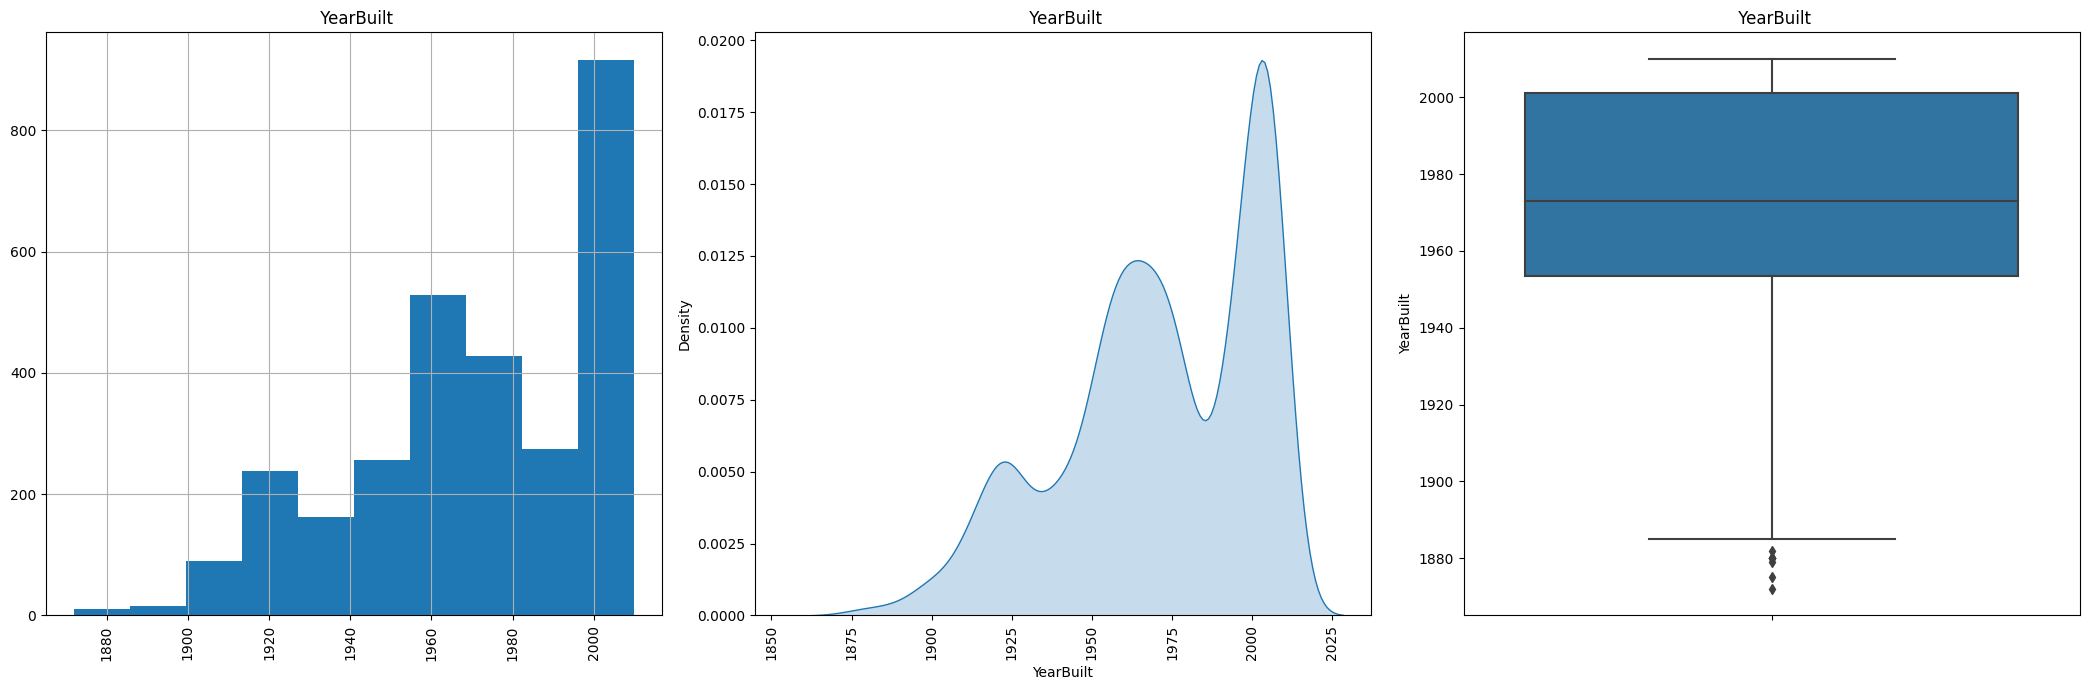

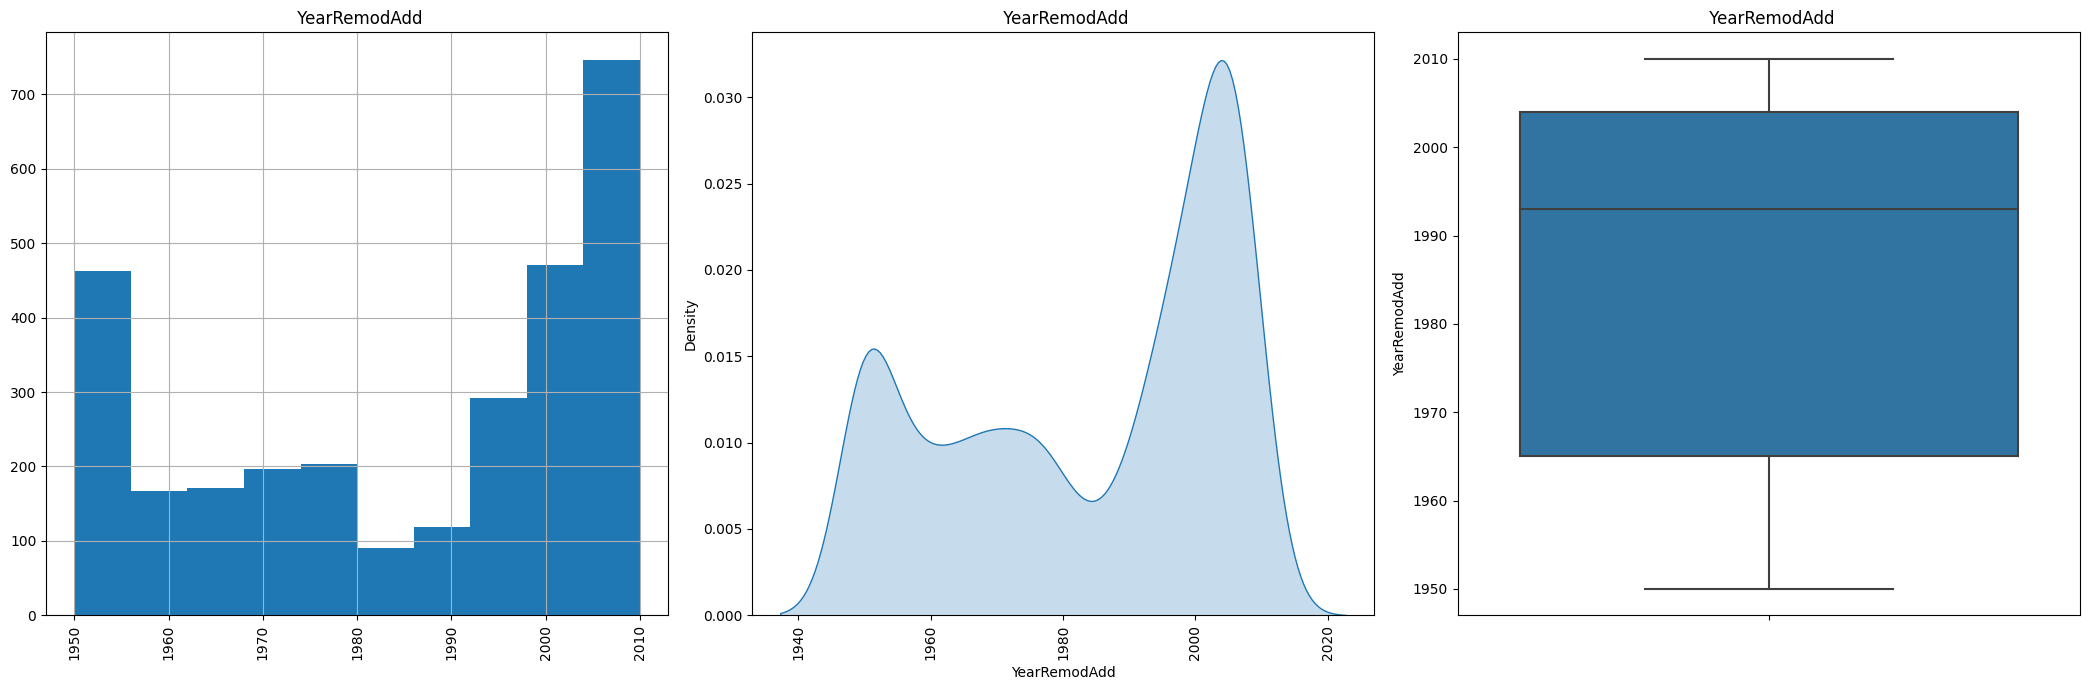

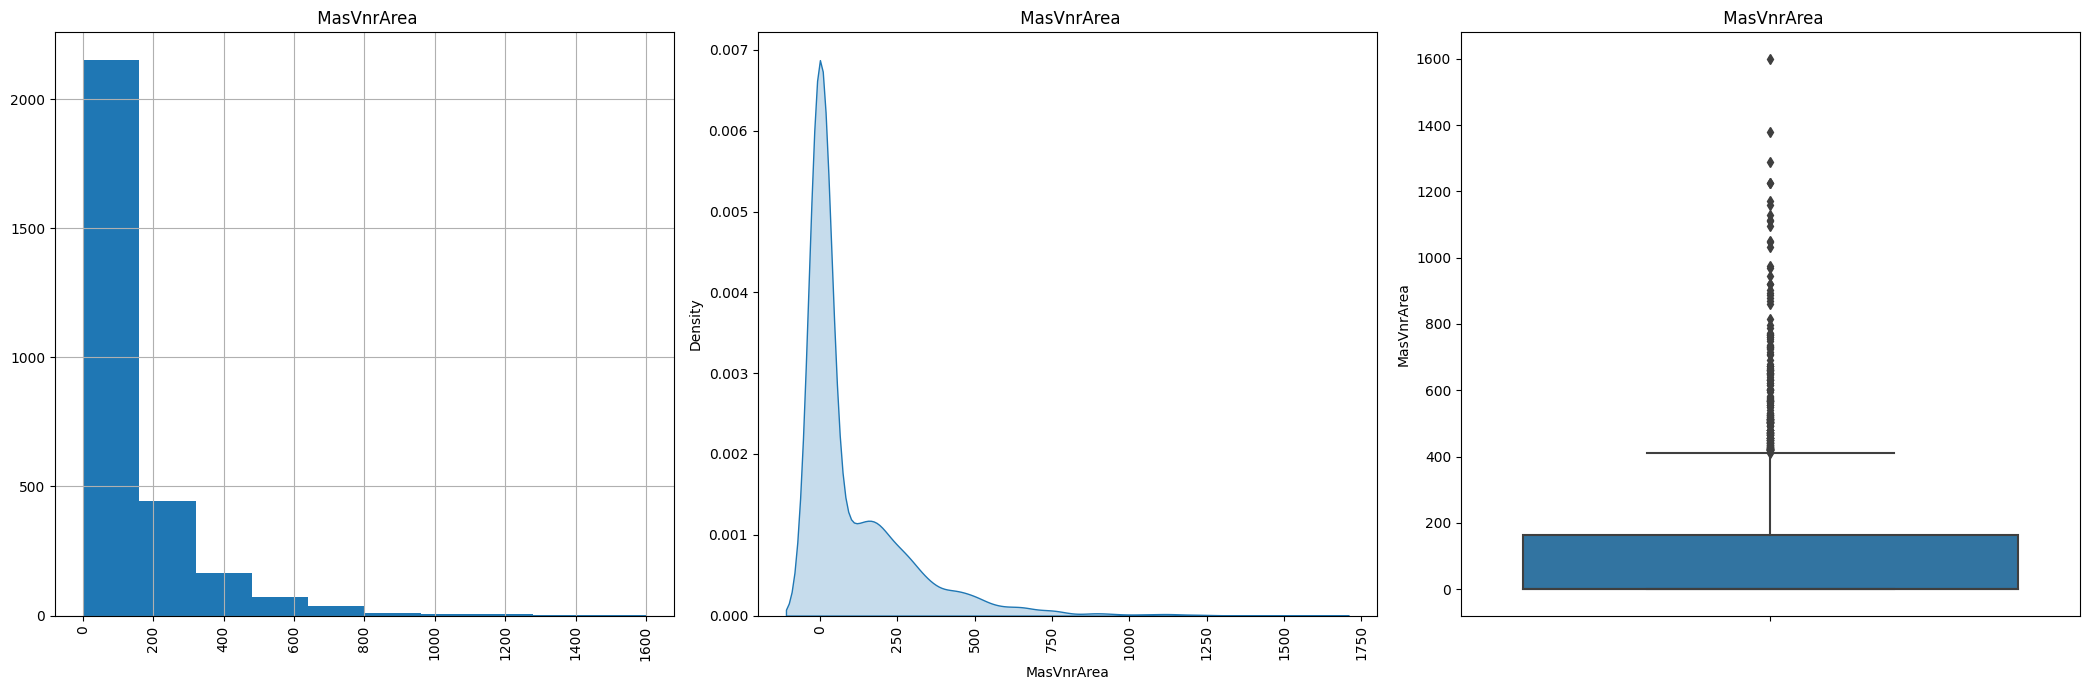

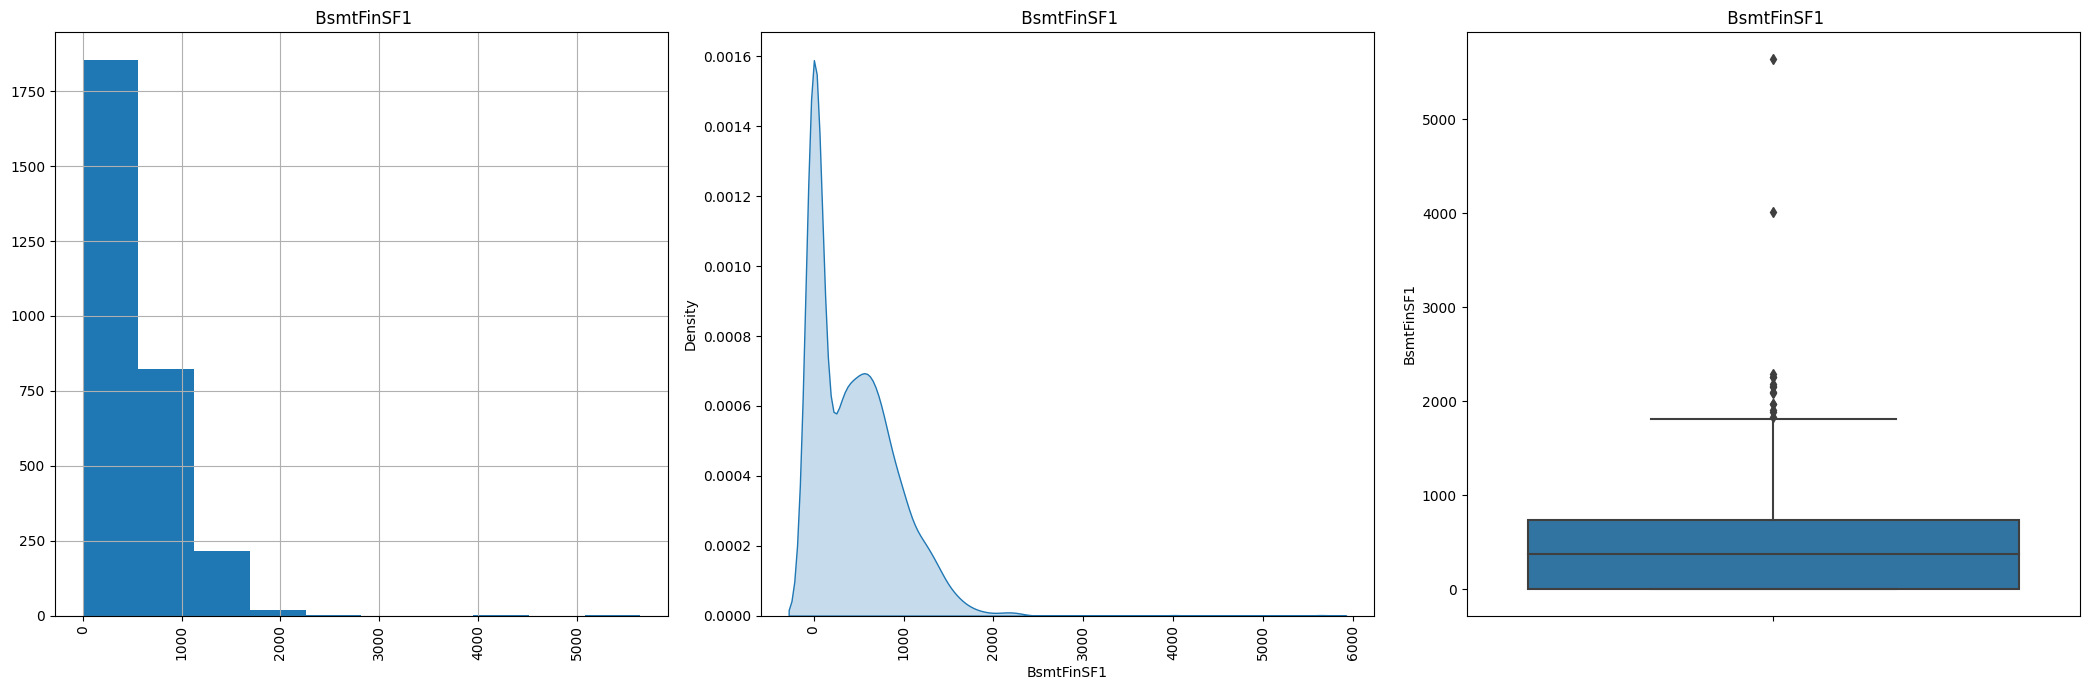

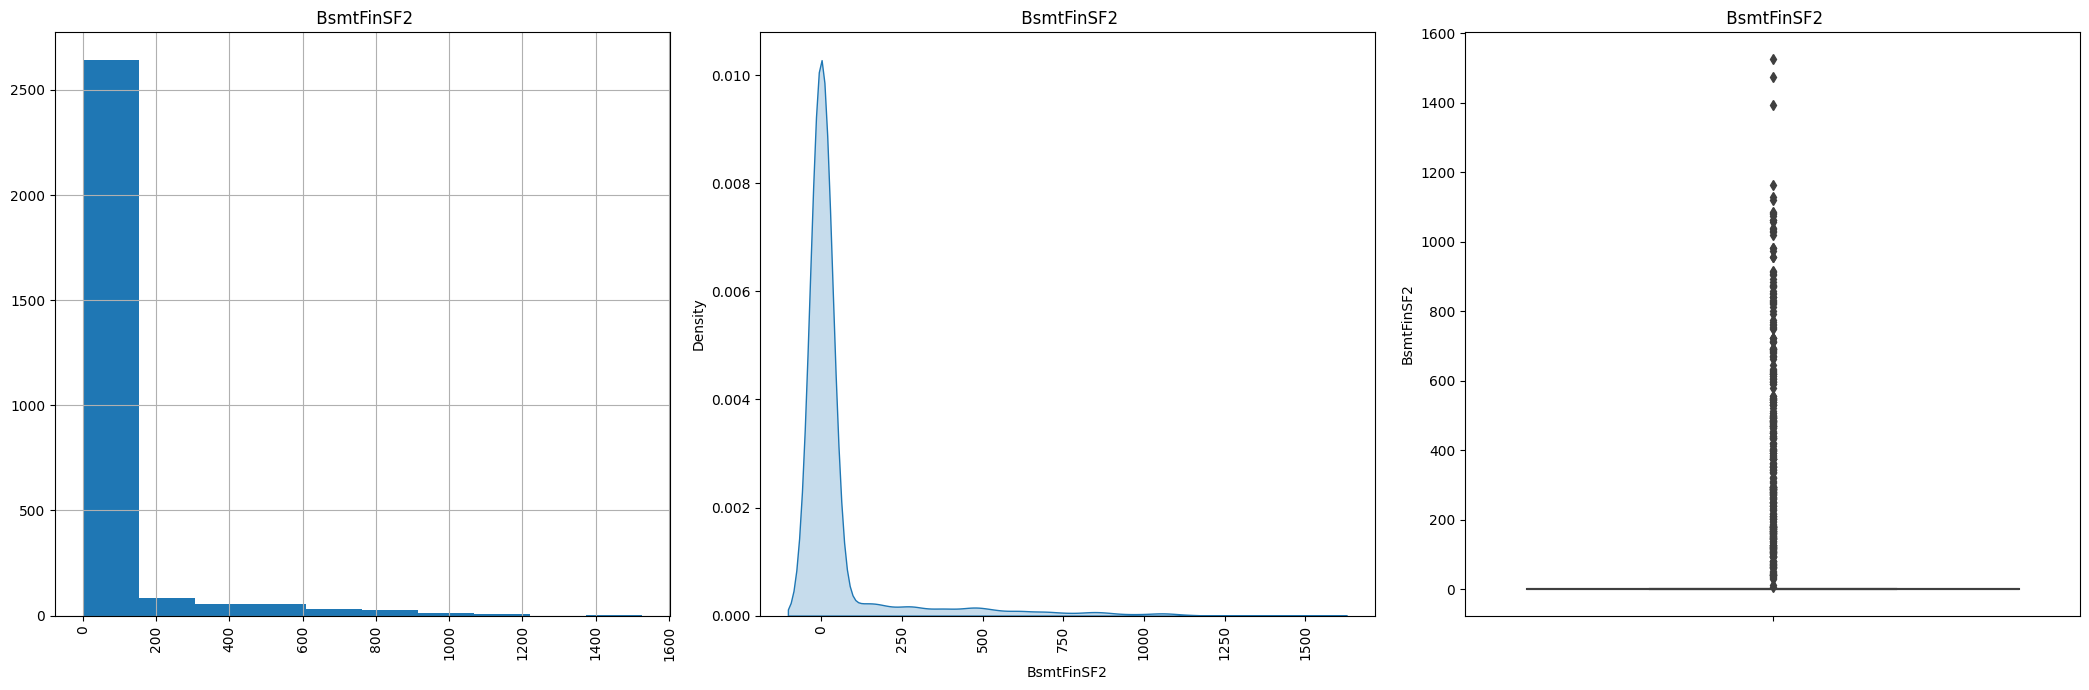

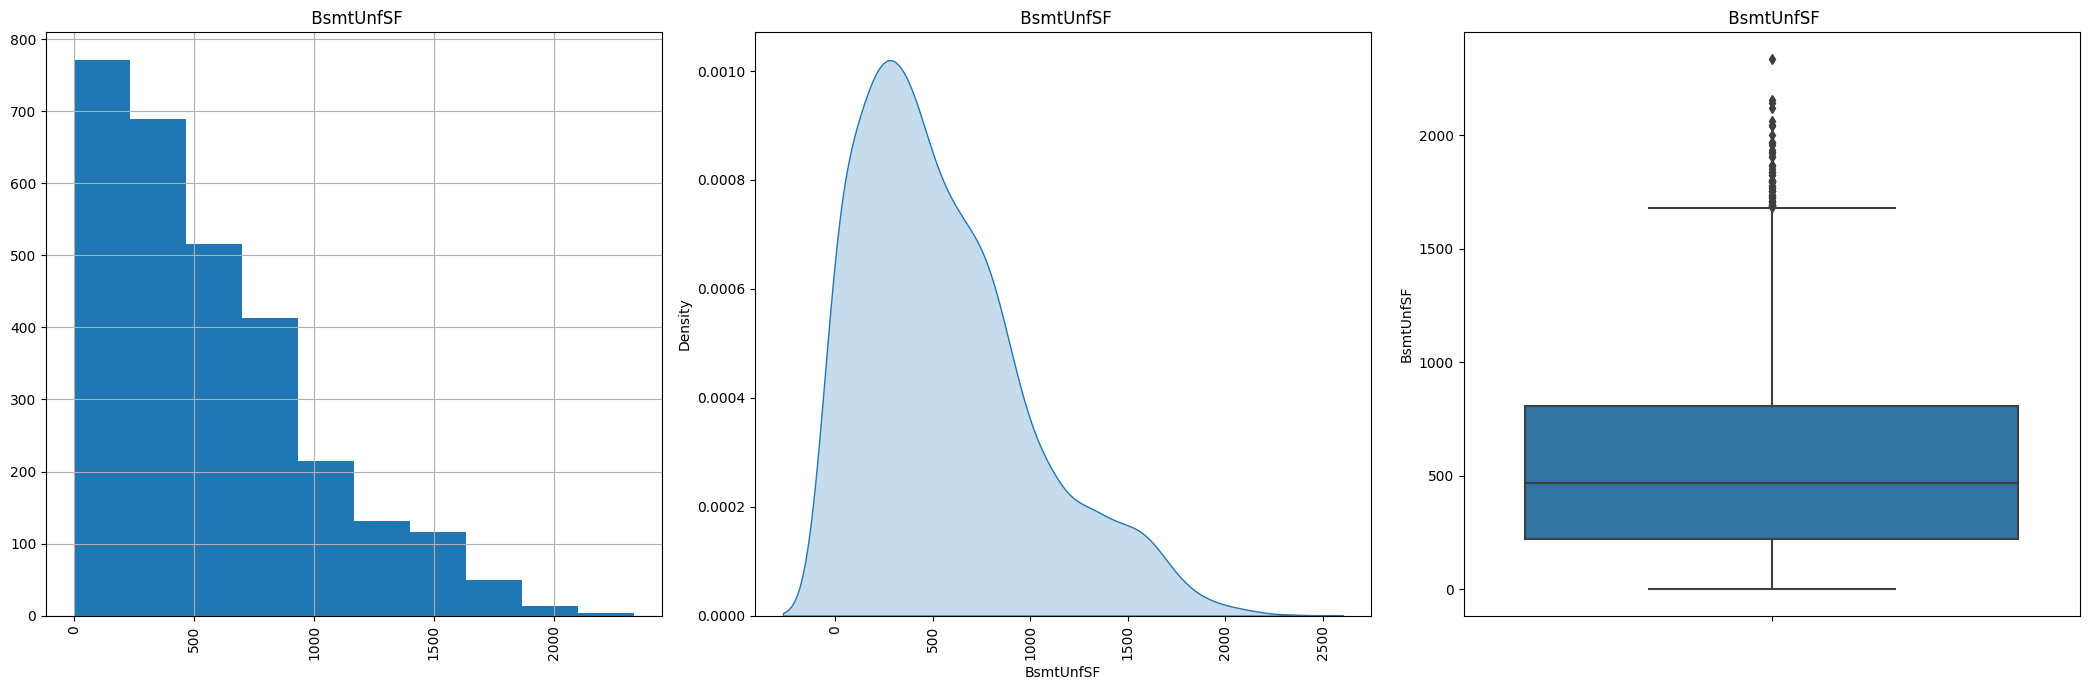

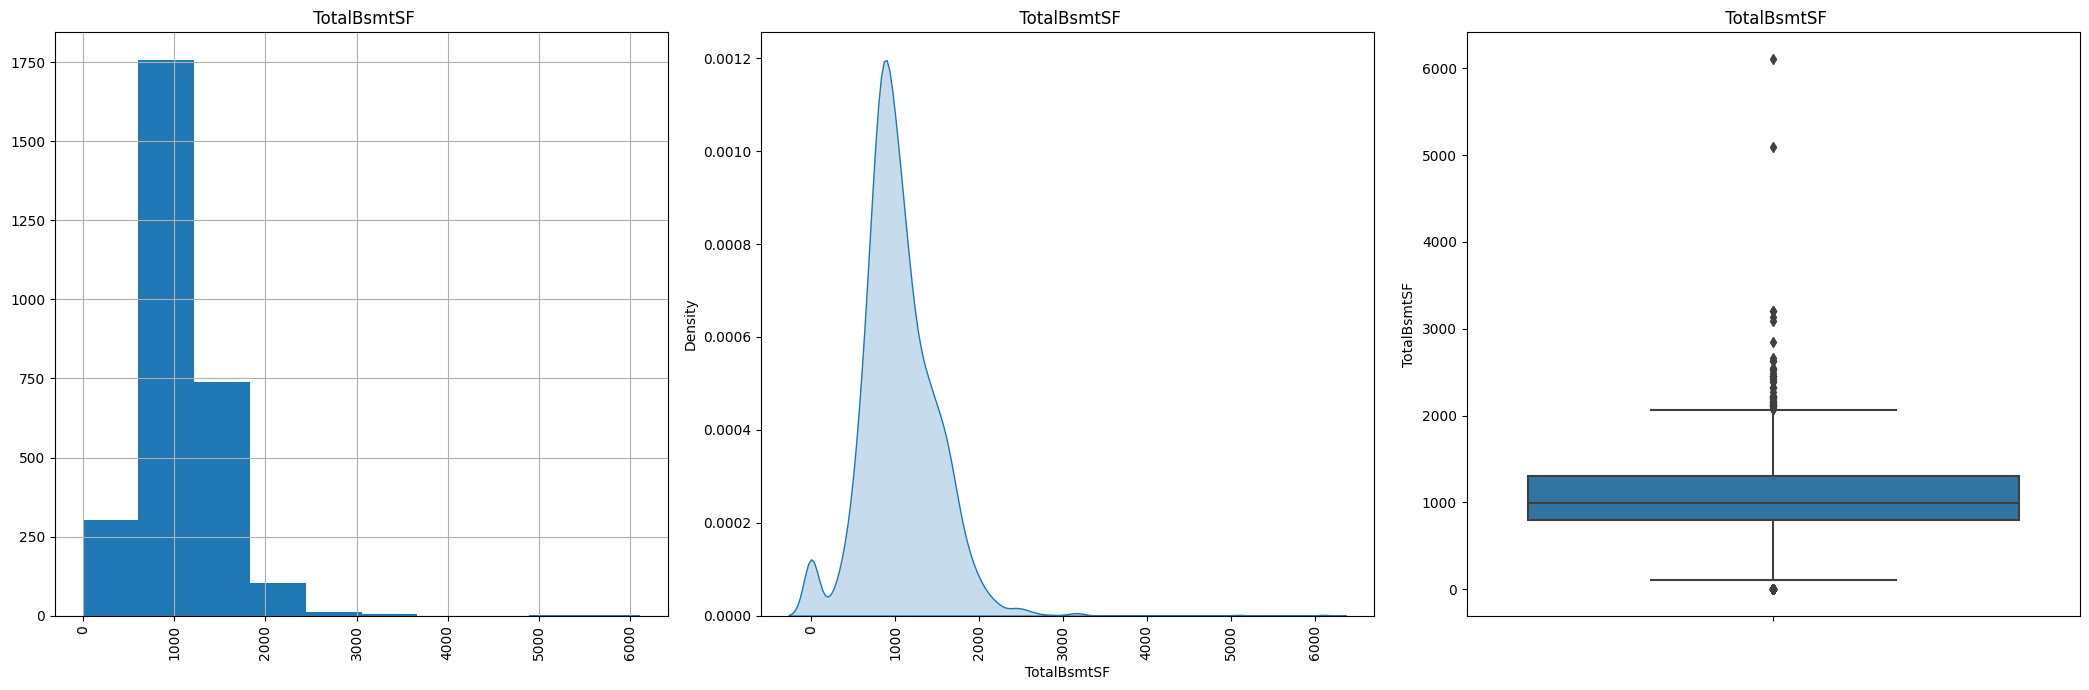

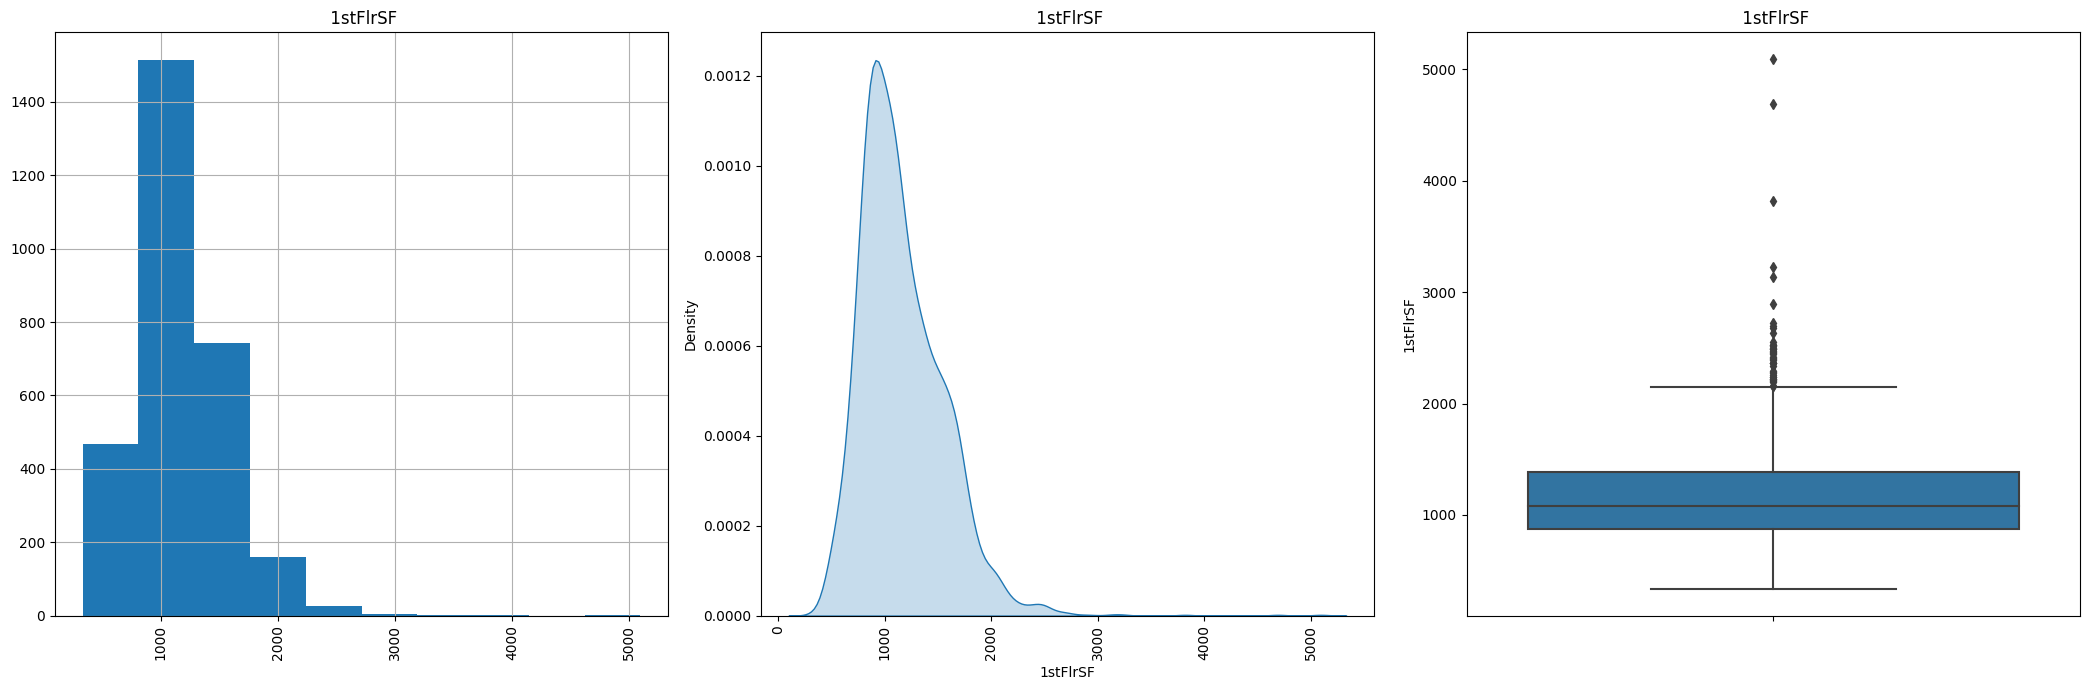

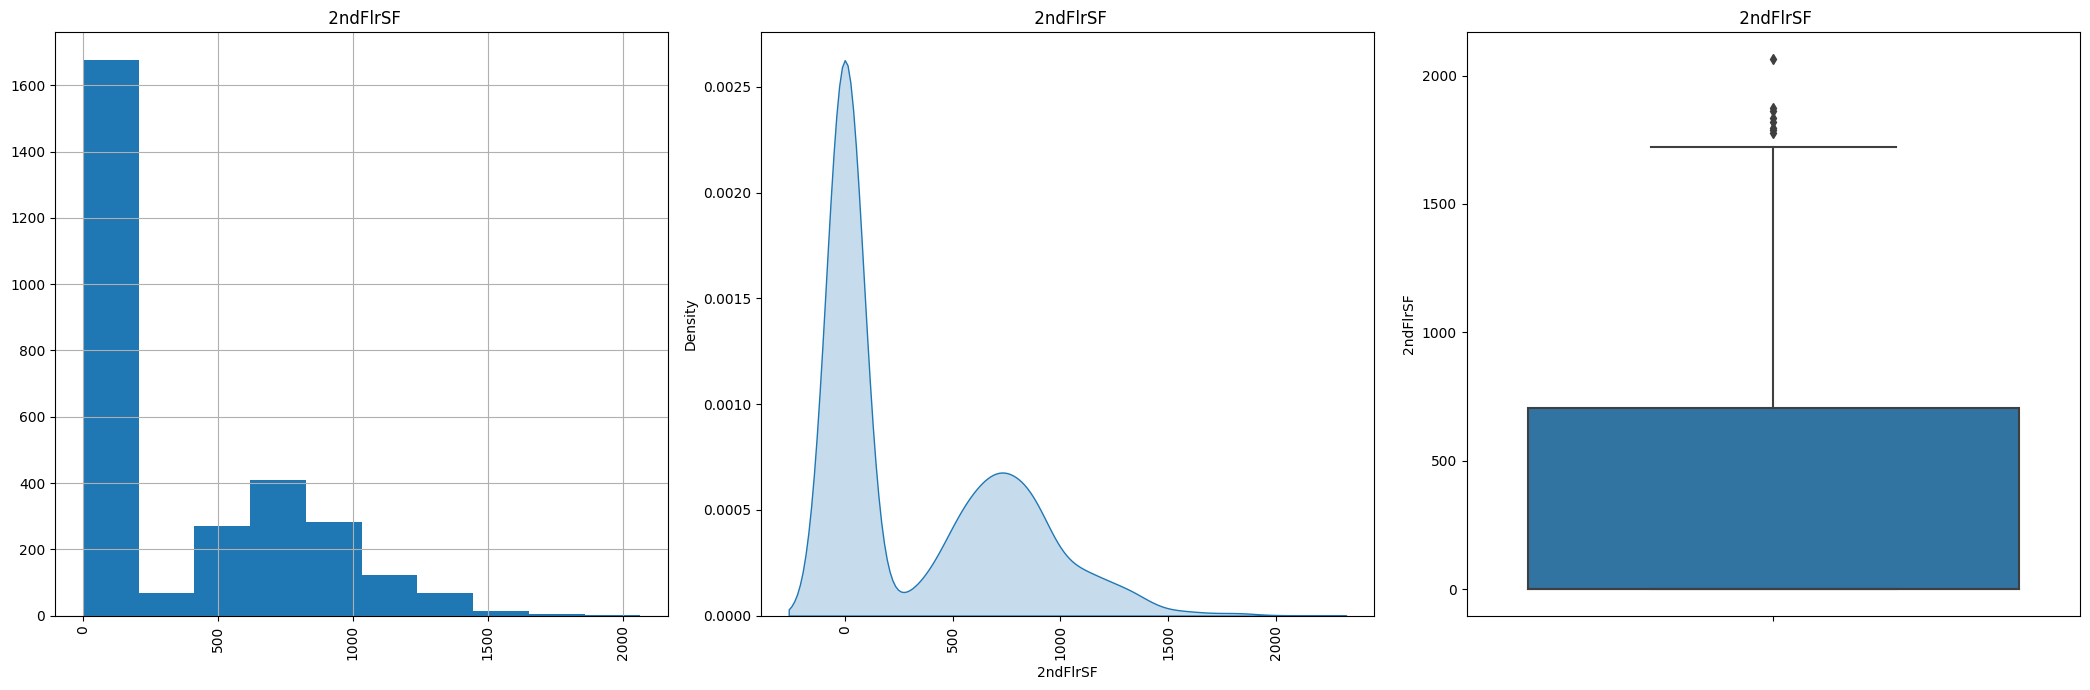

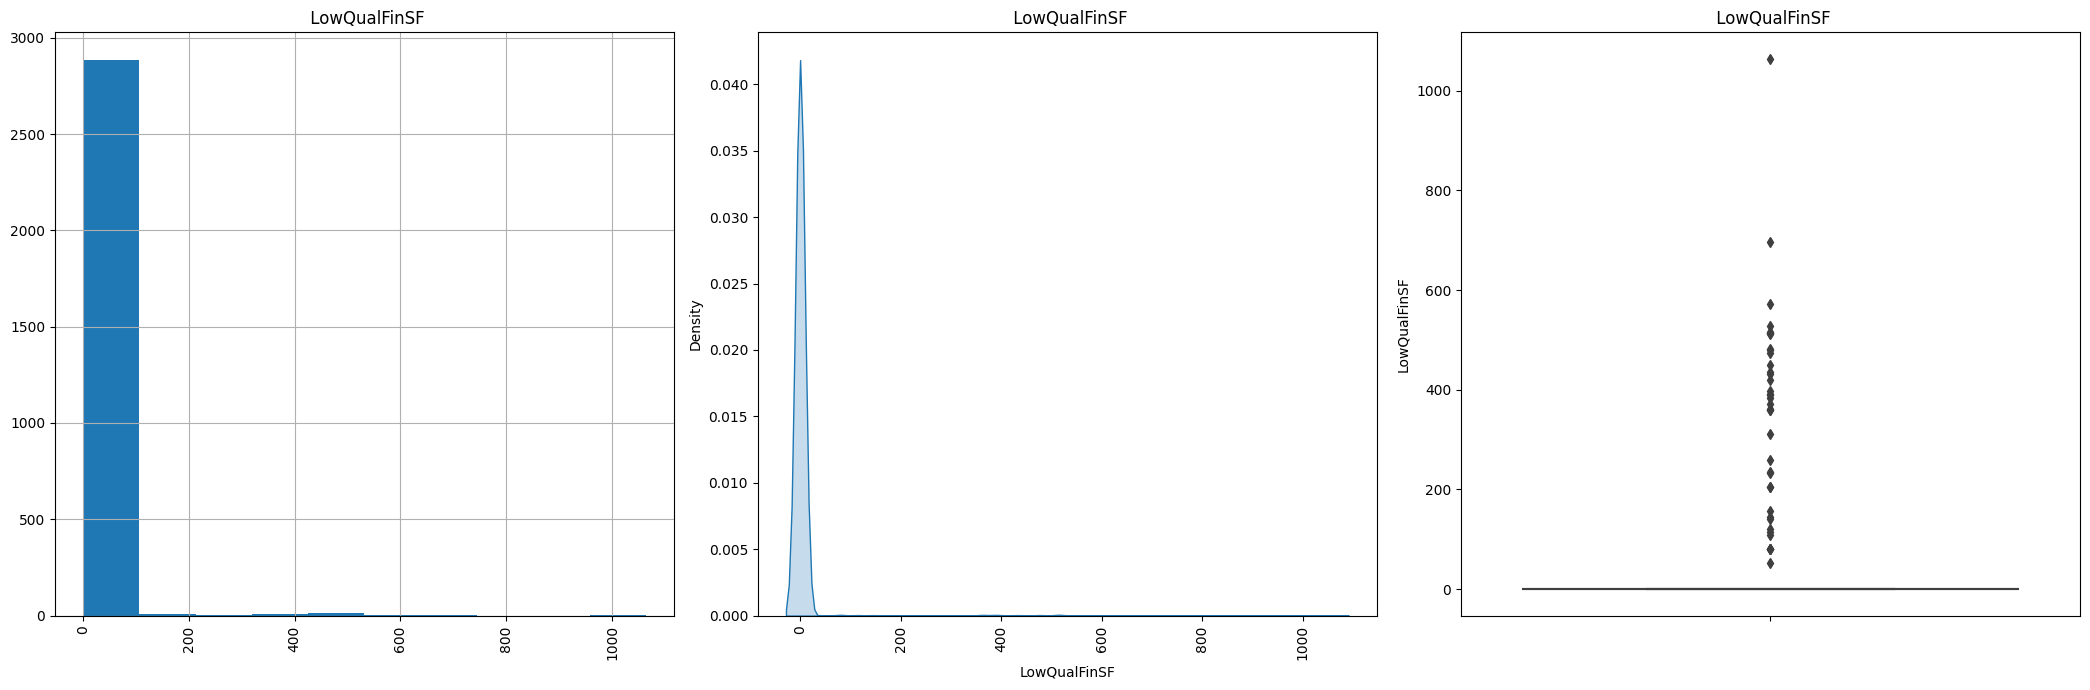

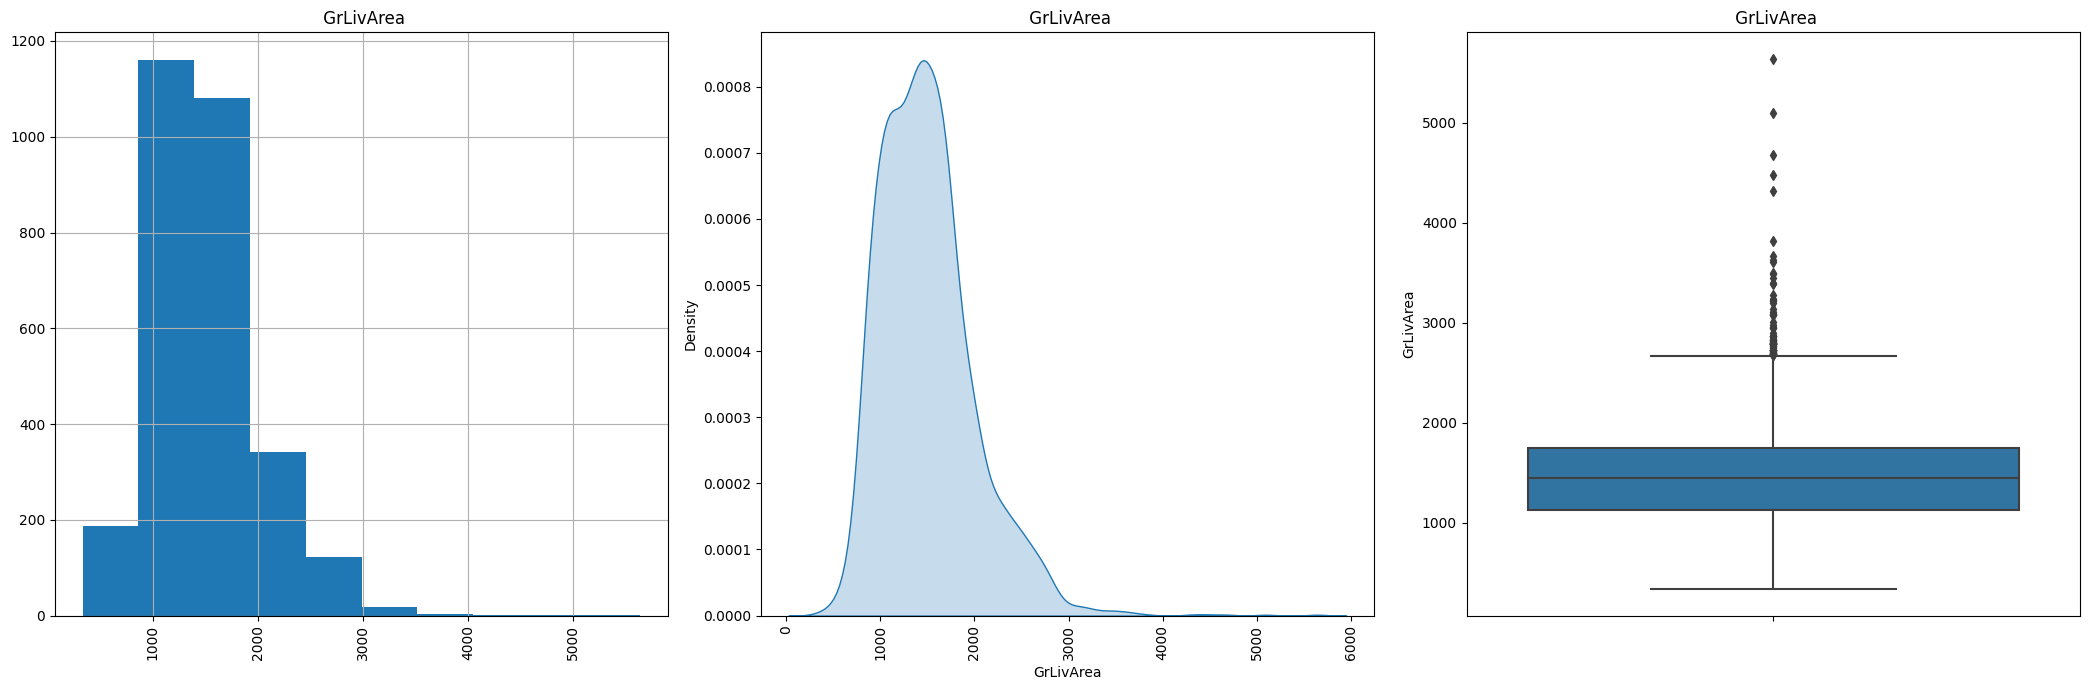

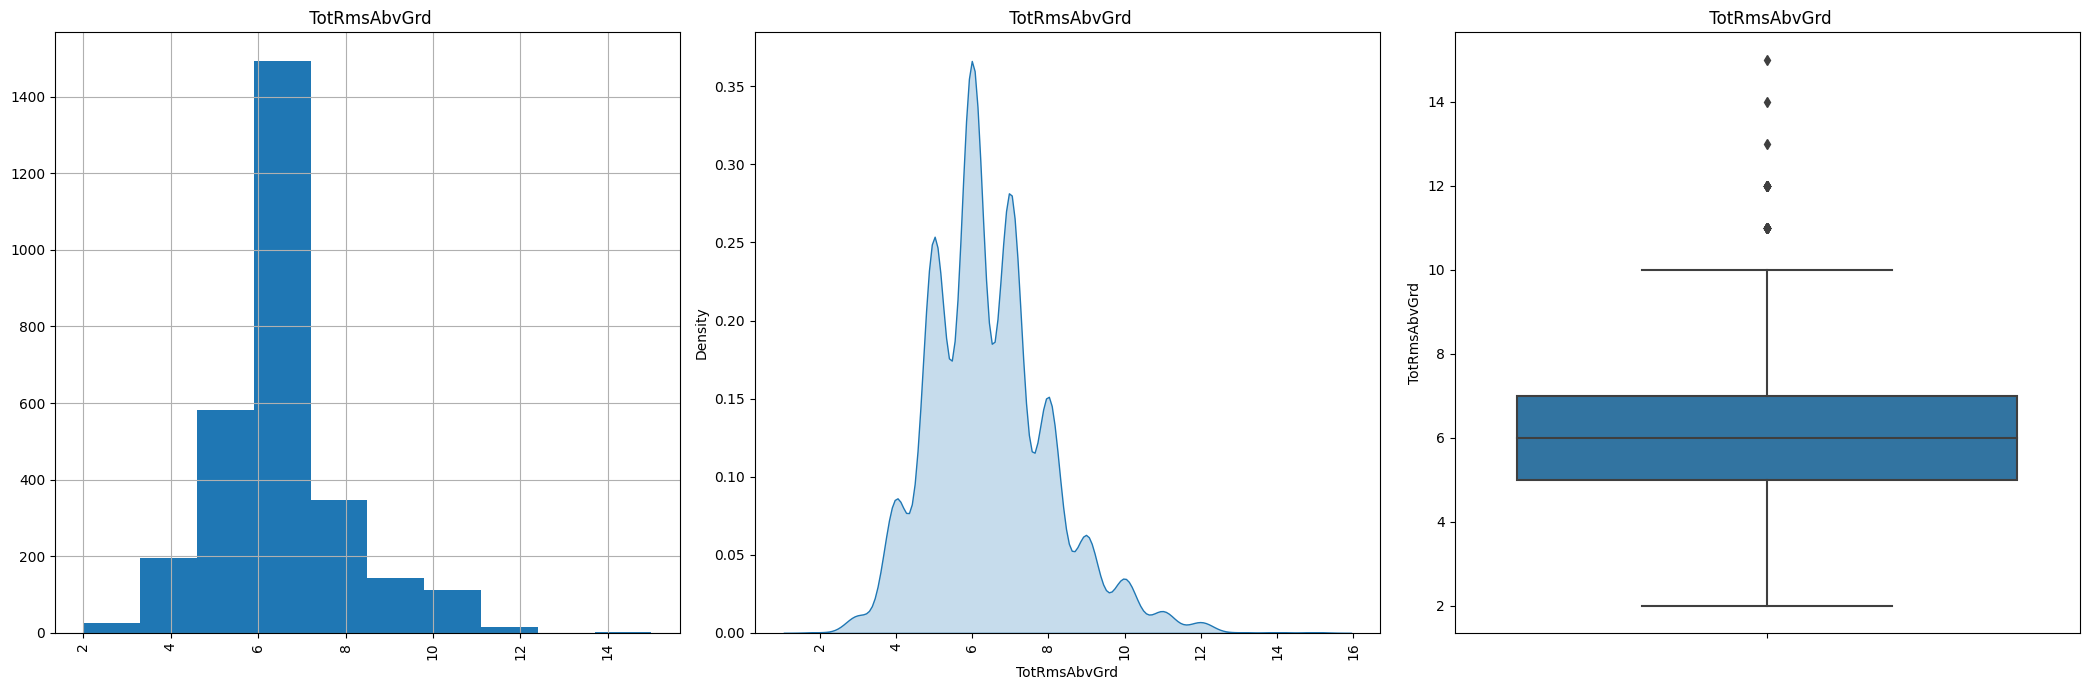

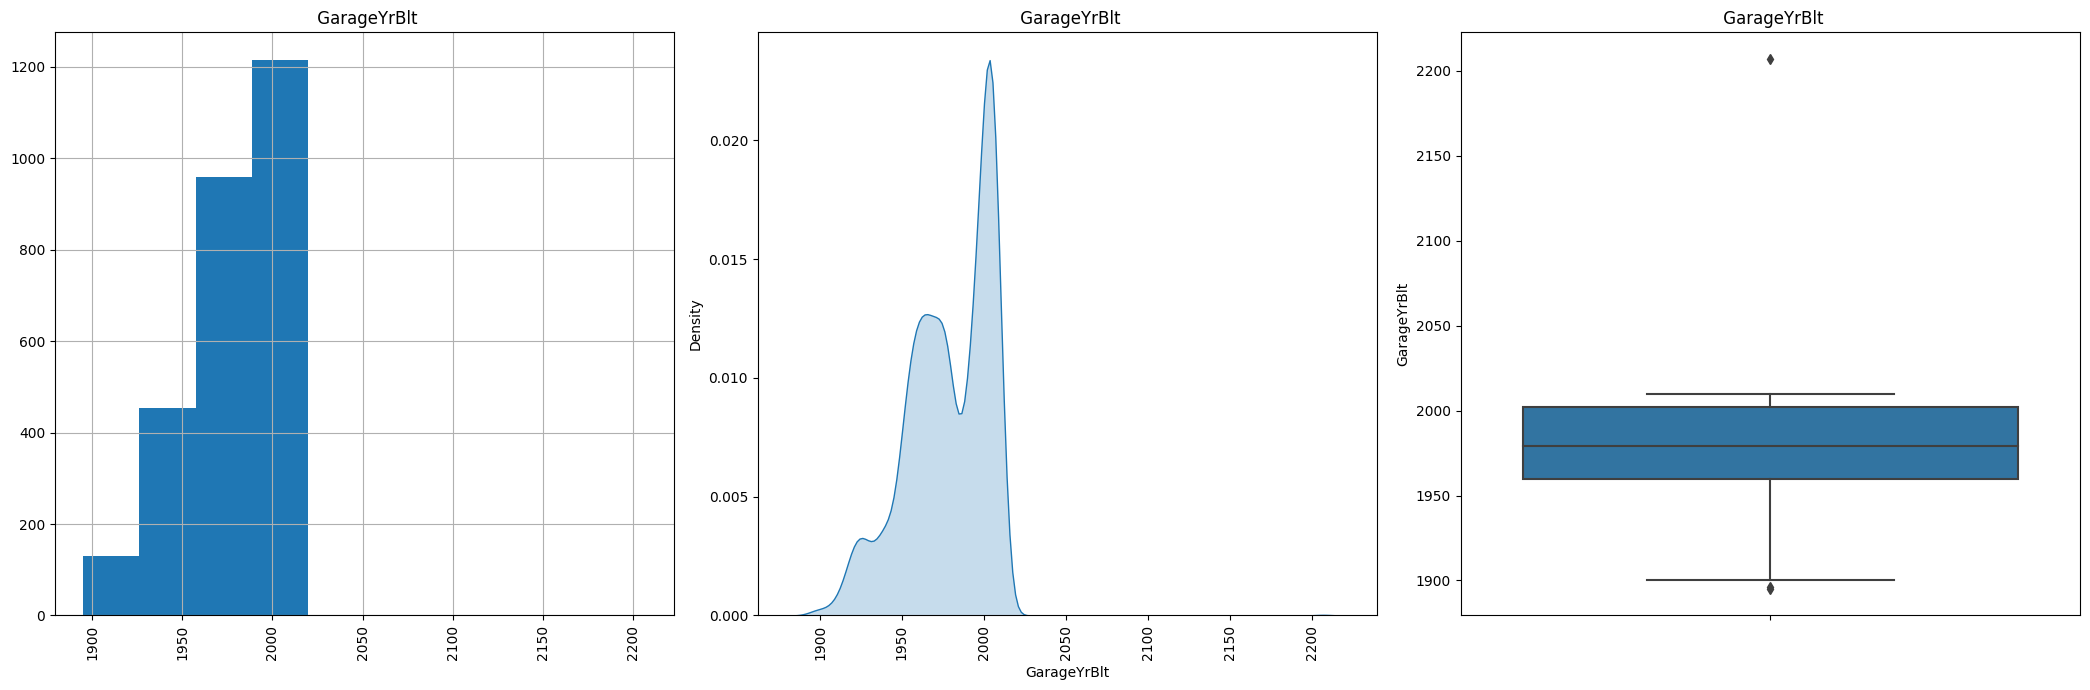

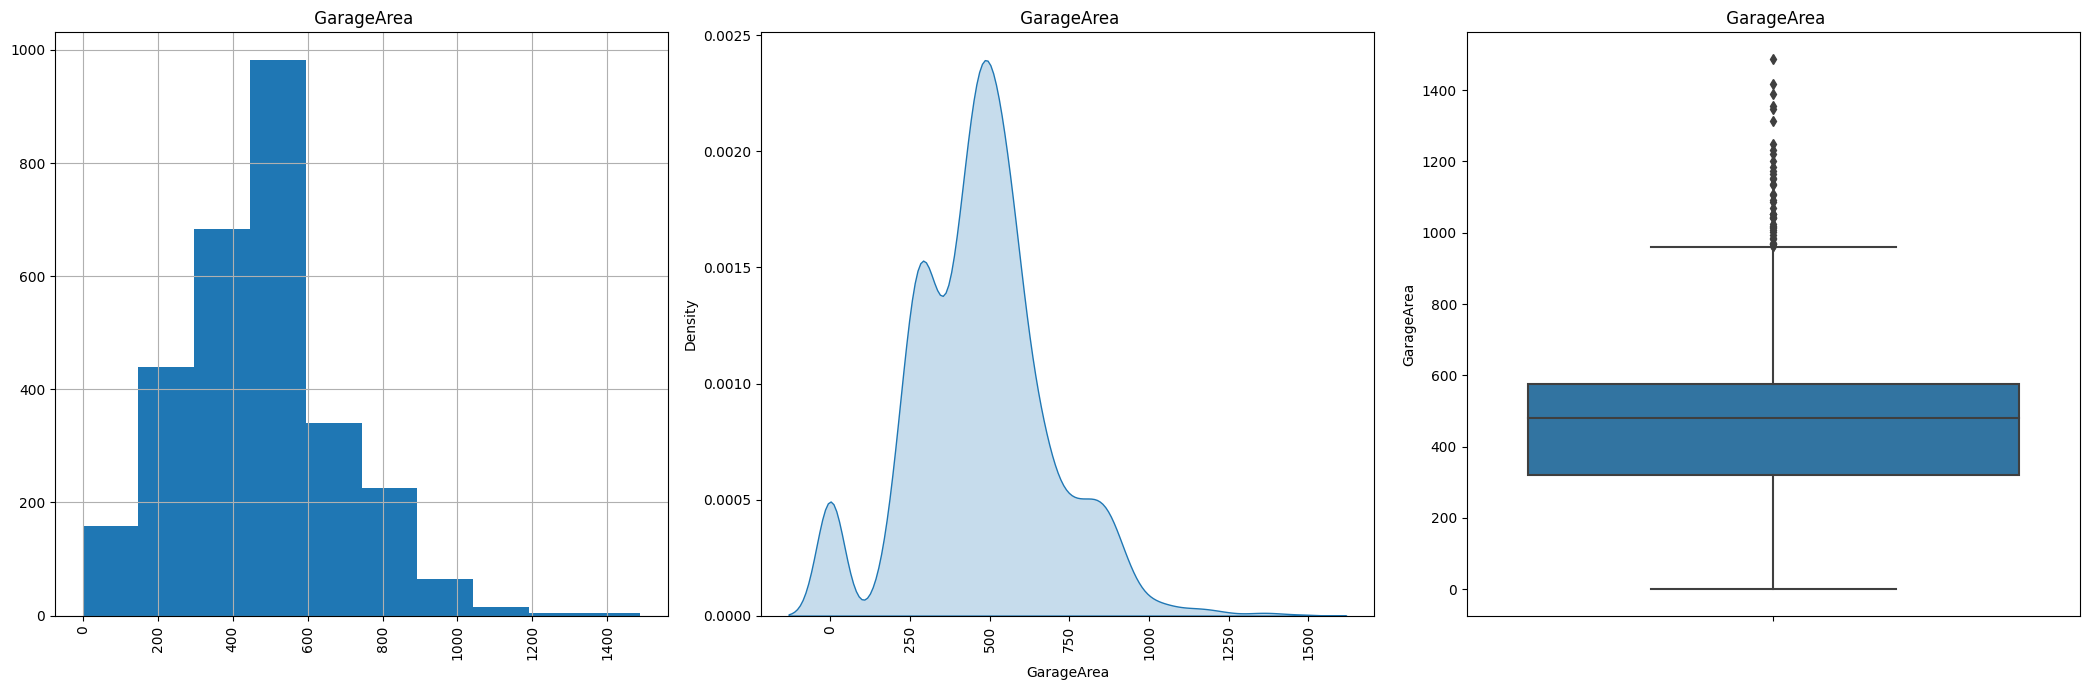

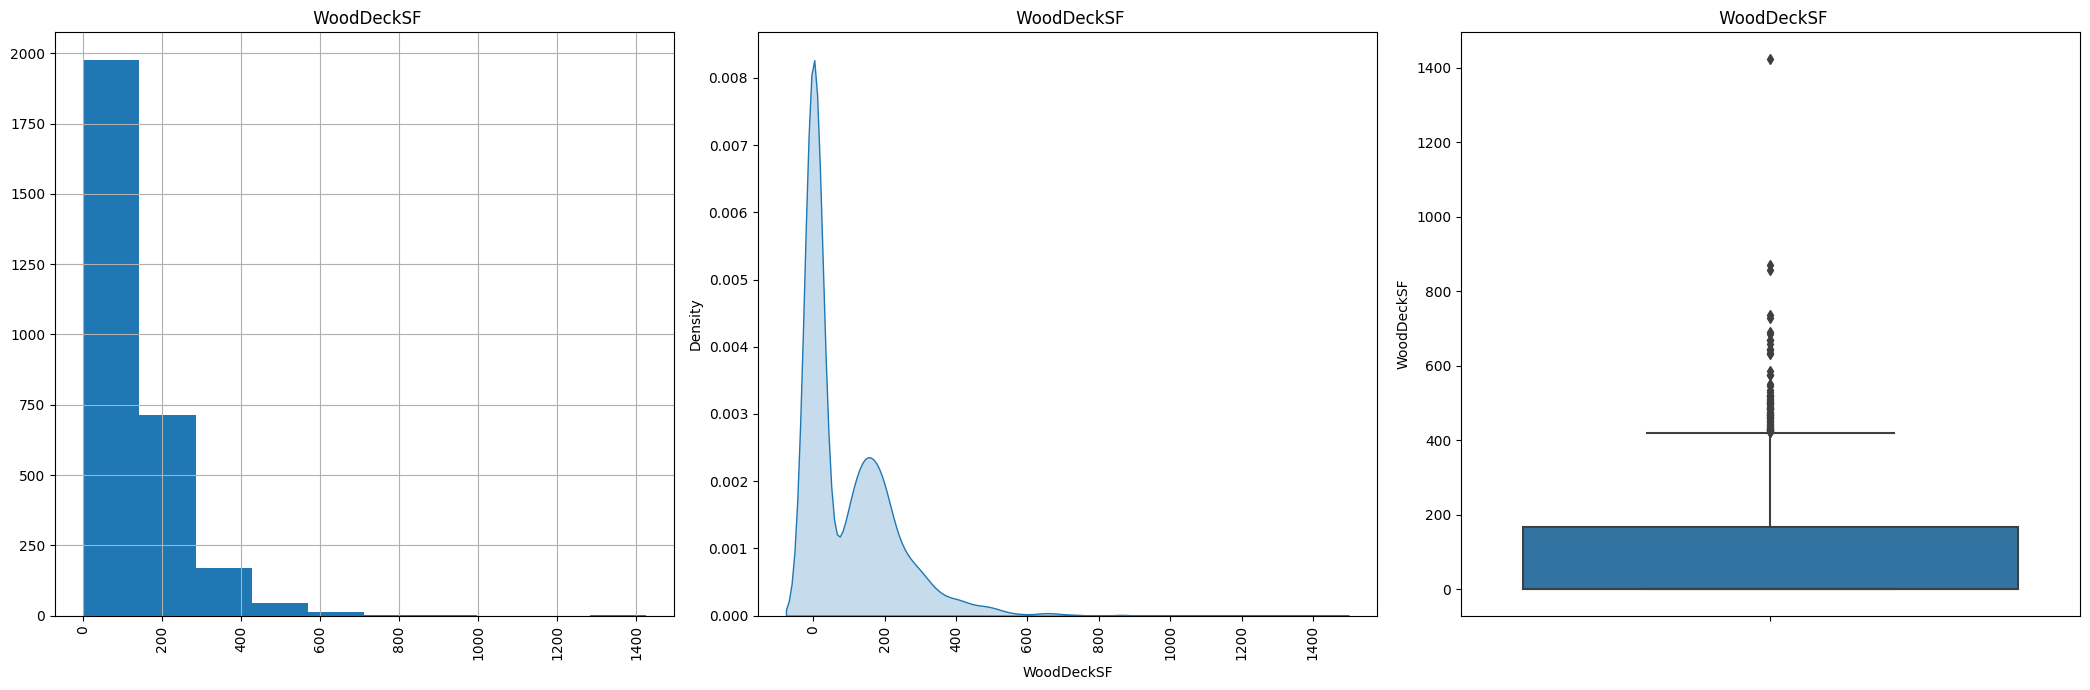

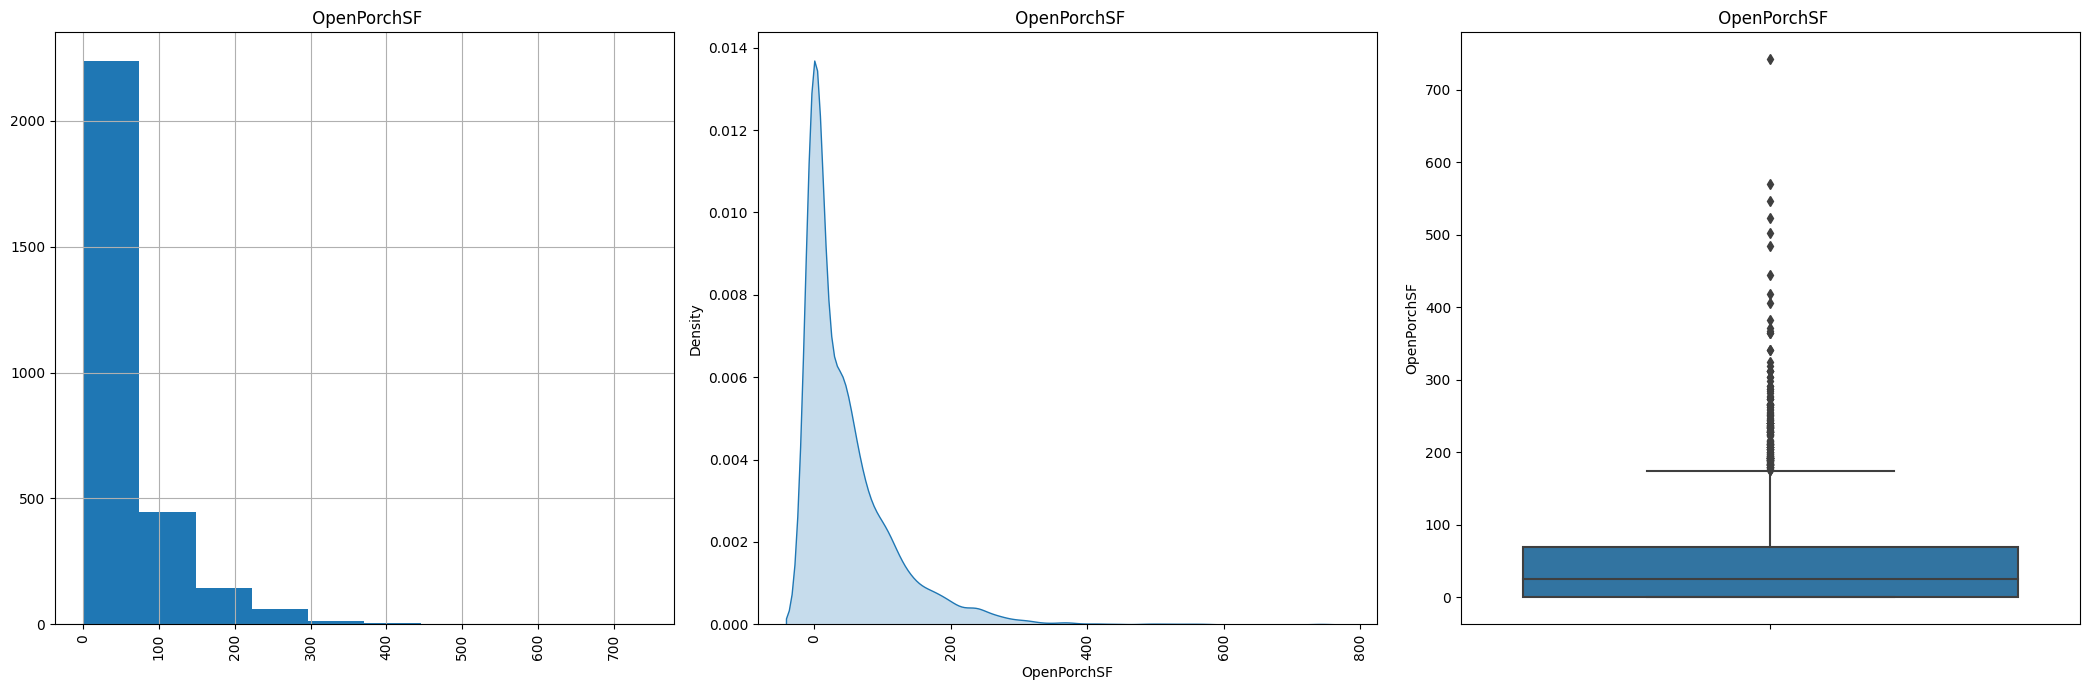

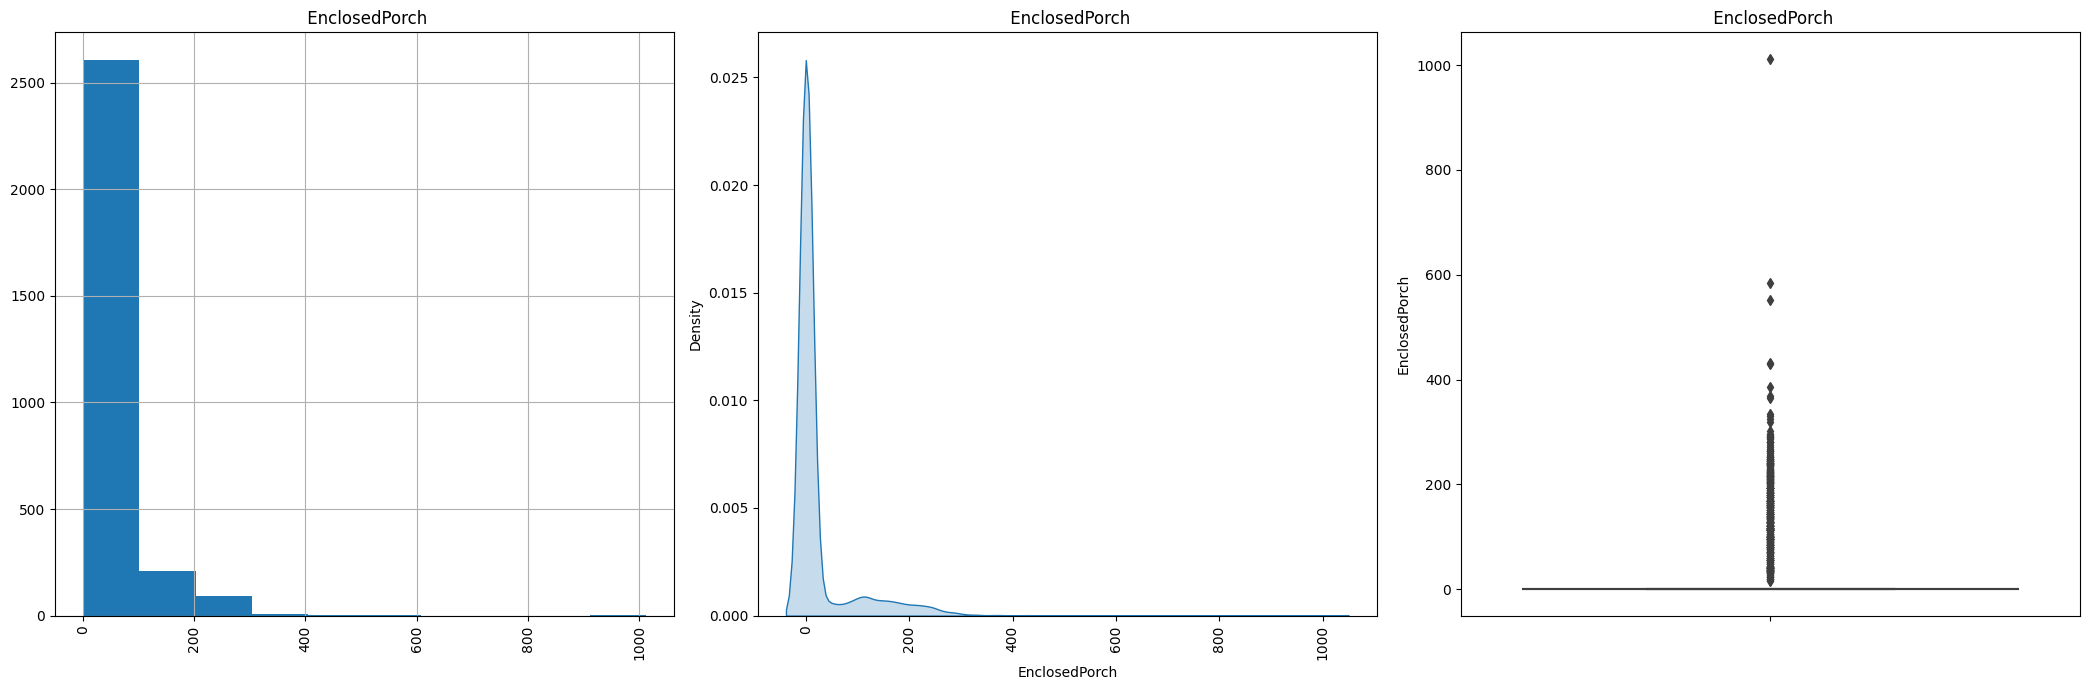

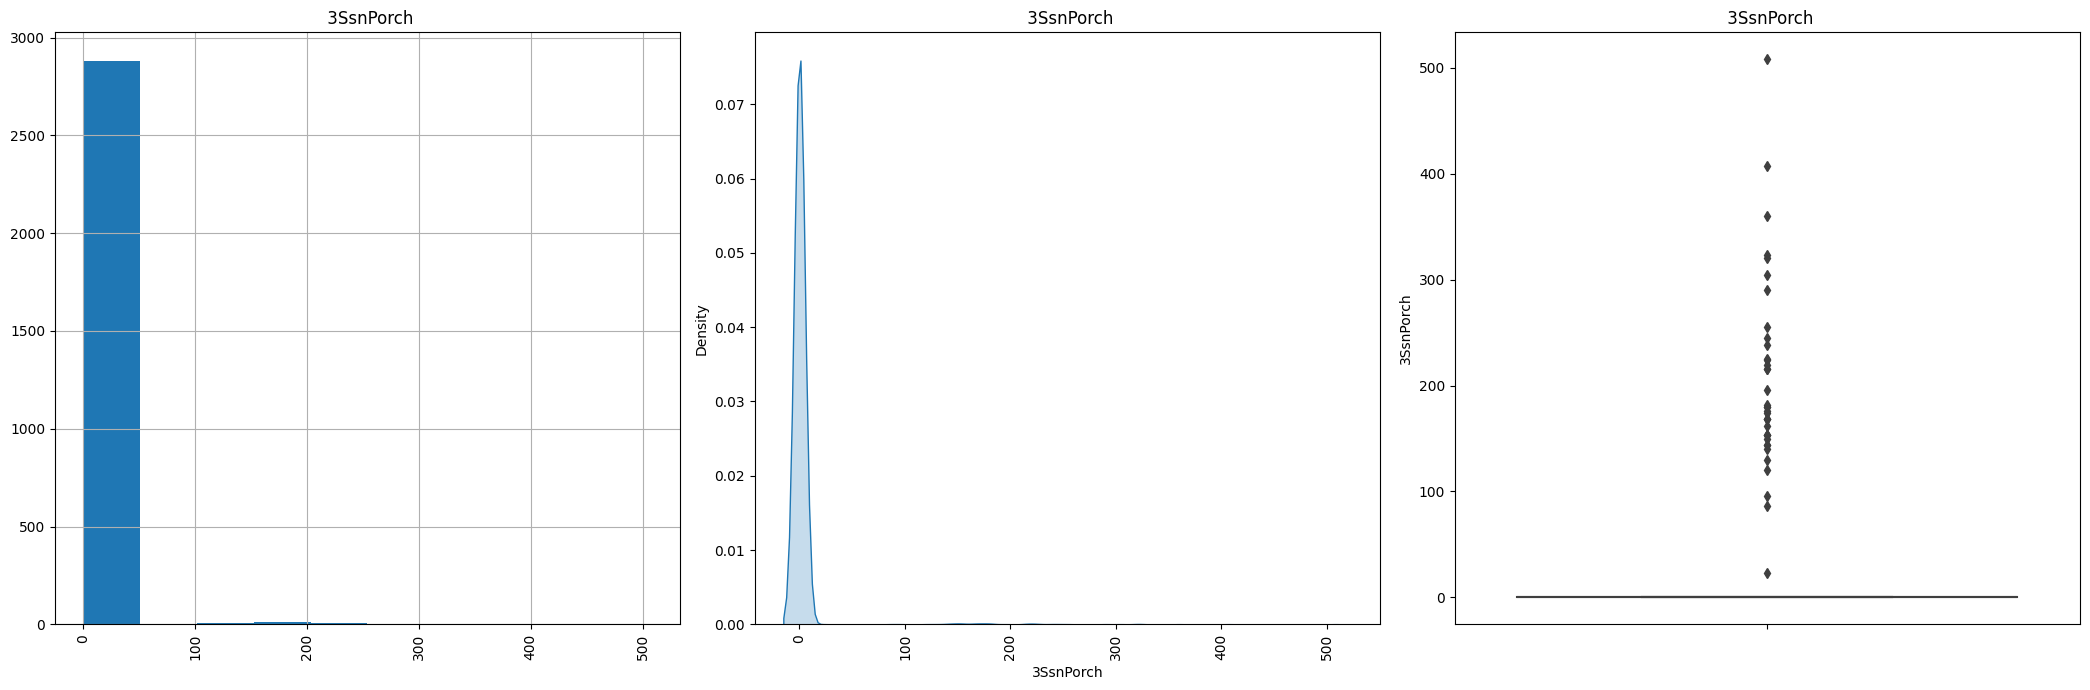

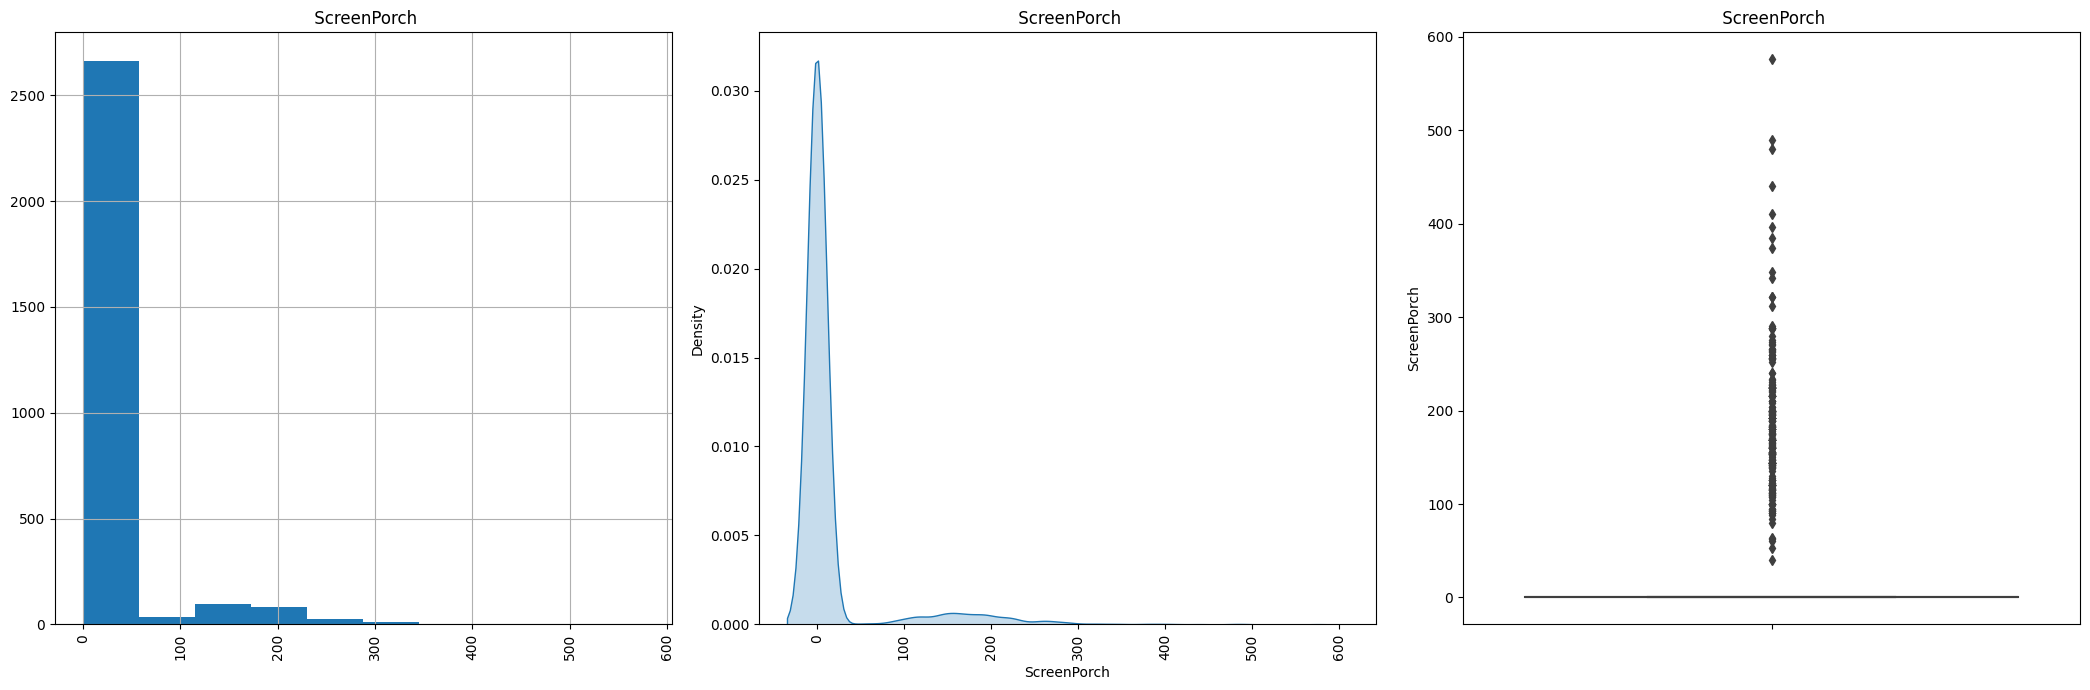

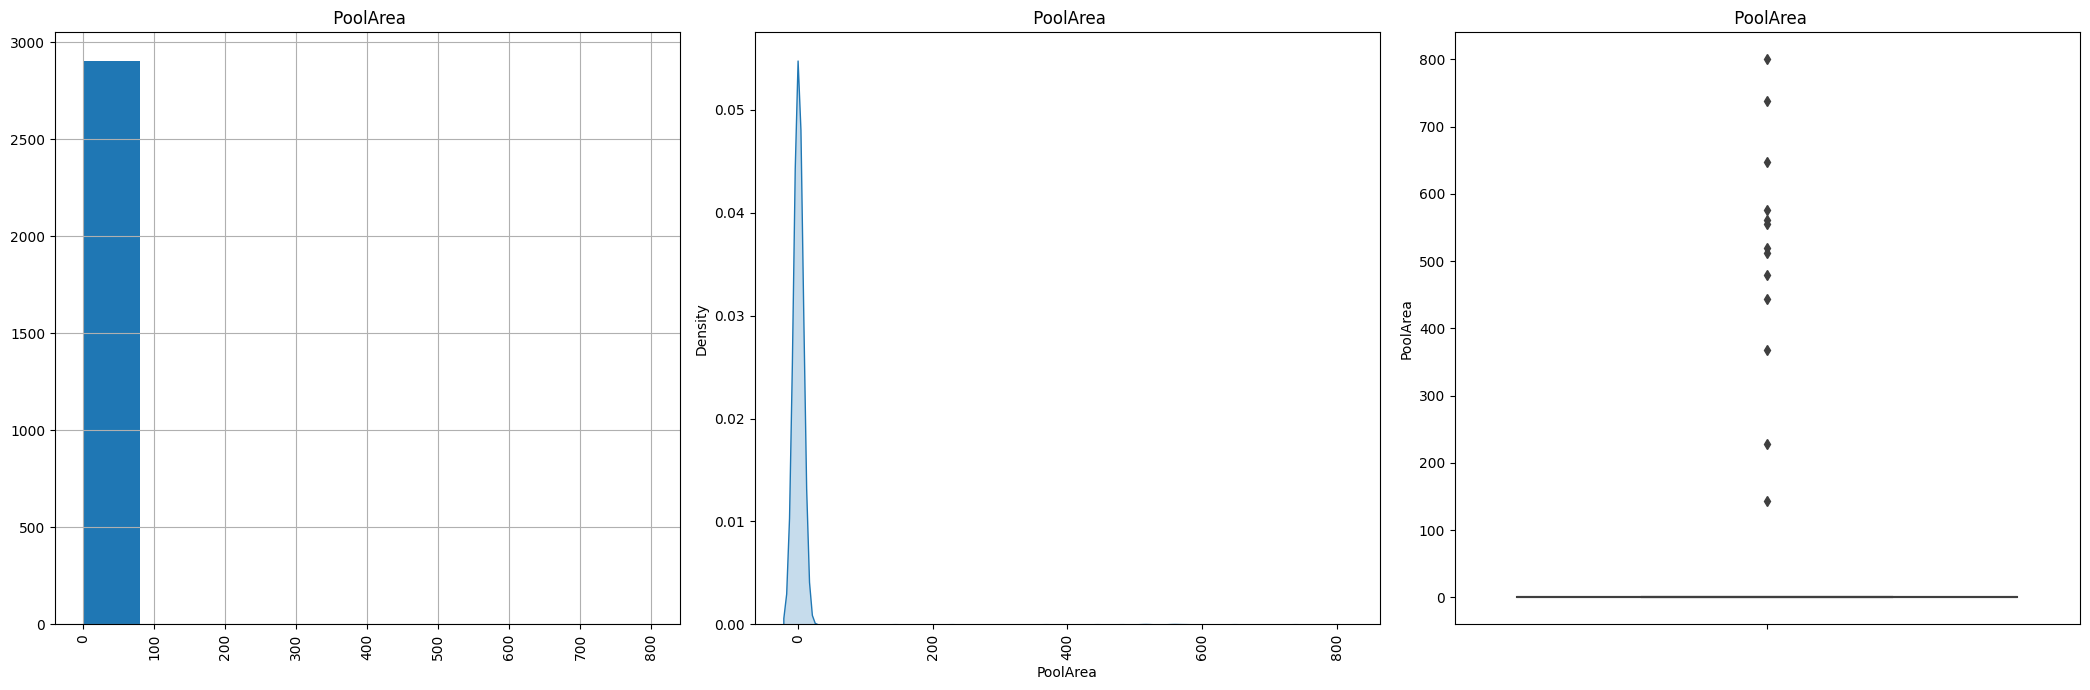

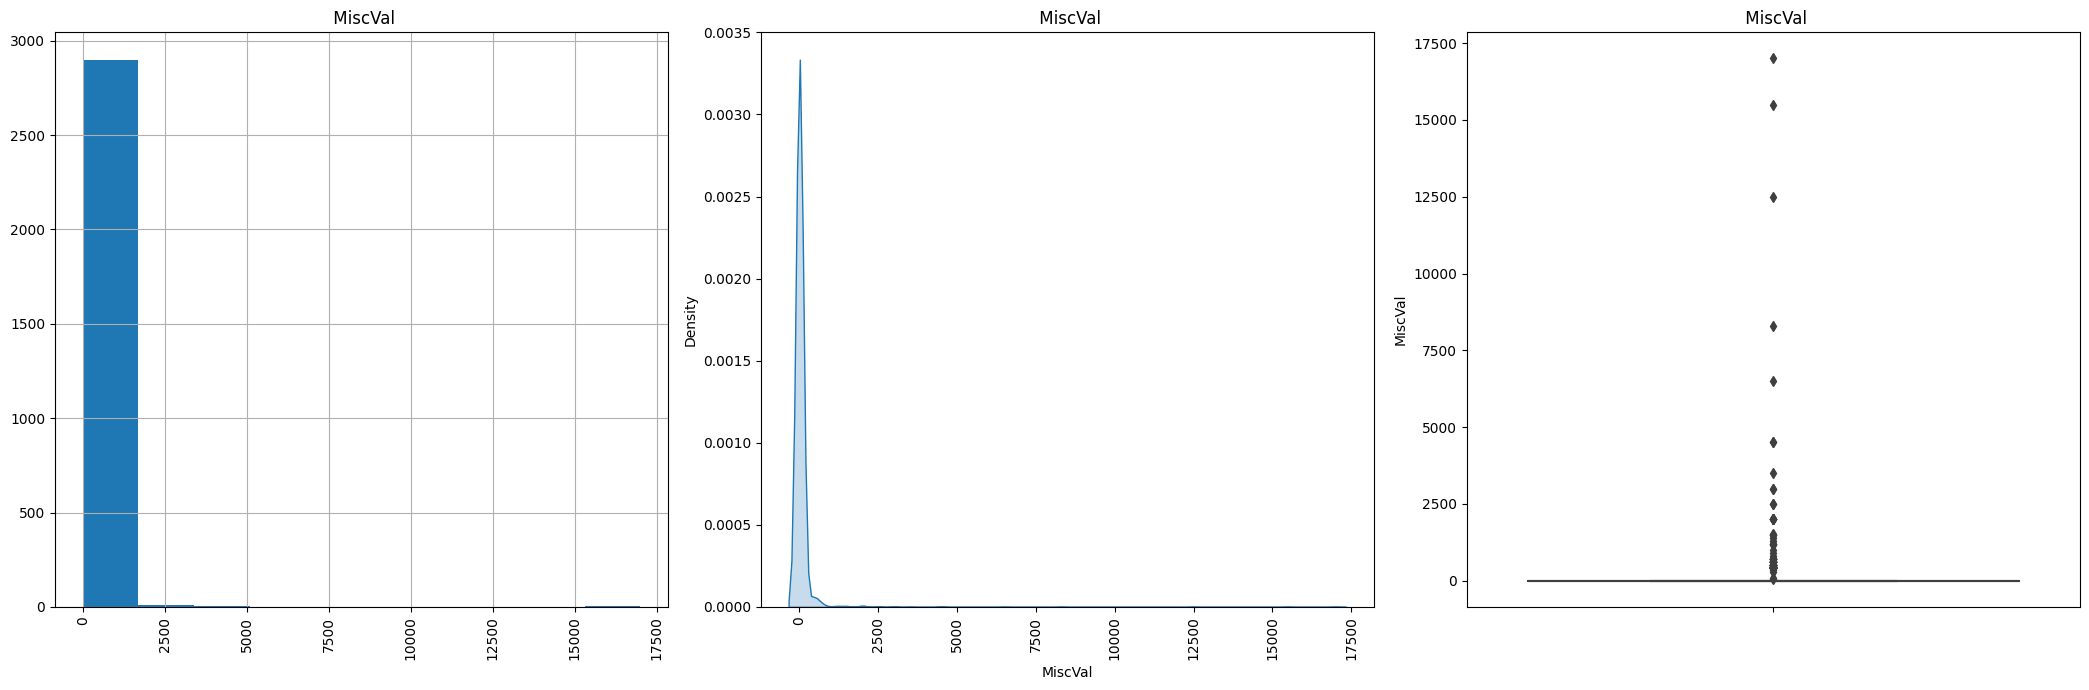

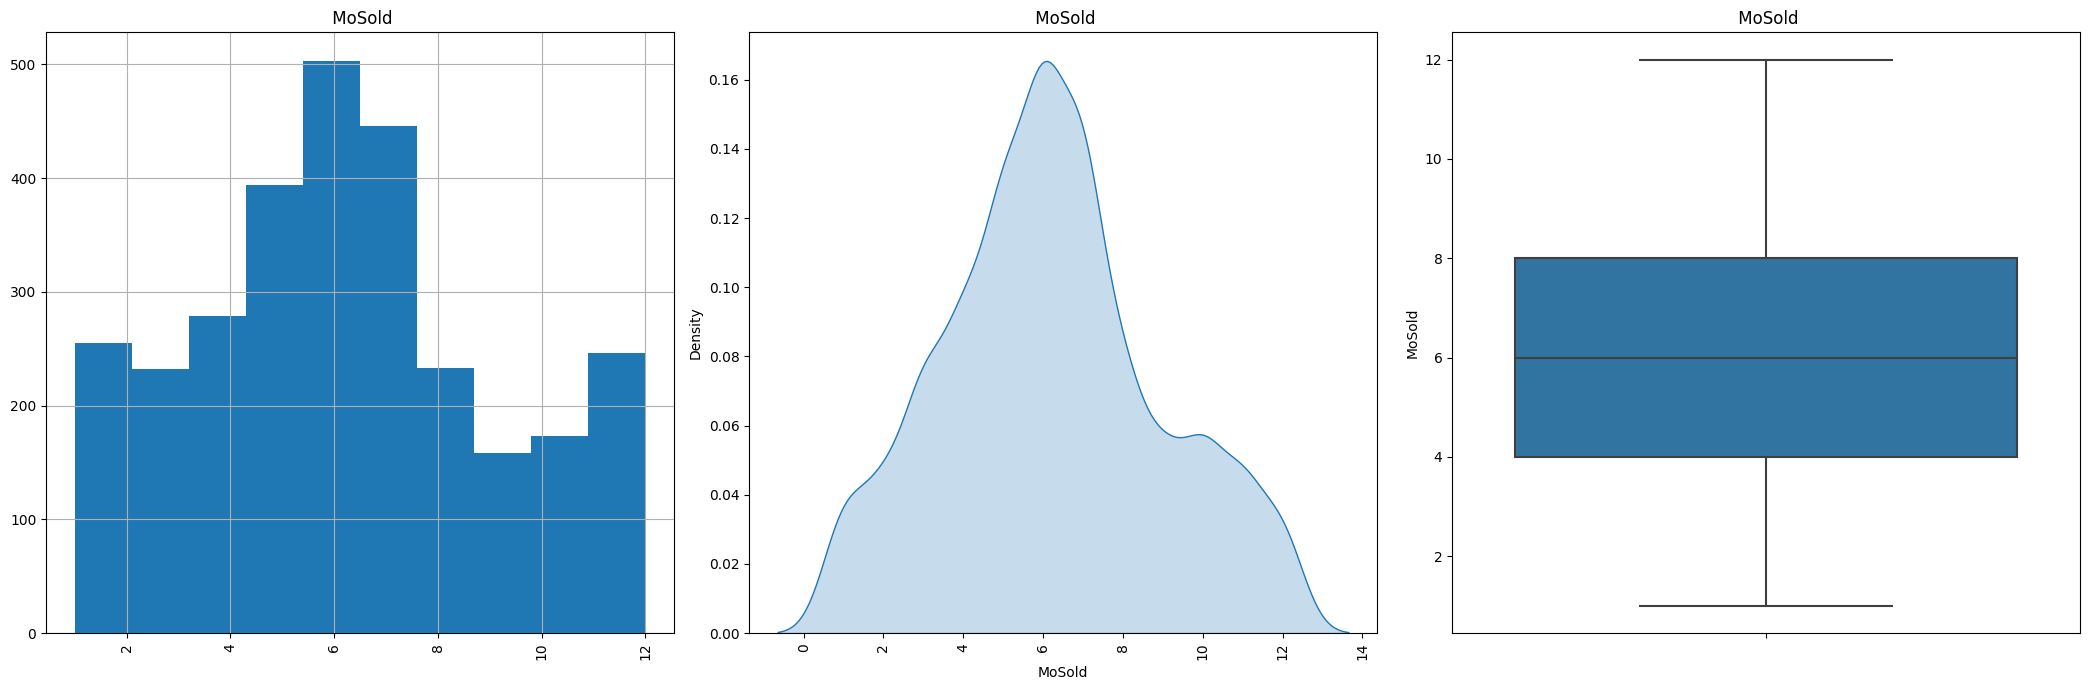

In [9]:
for col in num_cols:
    plt.figure(figsize=(21,7))
    
    plt.subplot(1,3,1)
    df[col].hist()
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=col, data=df)
    plt.title(f' {col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

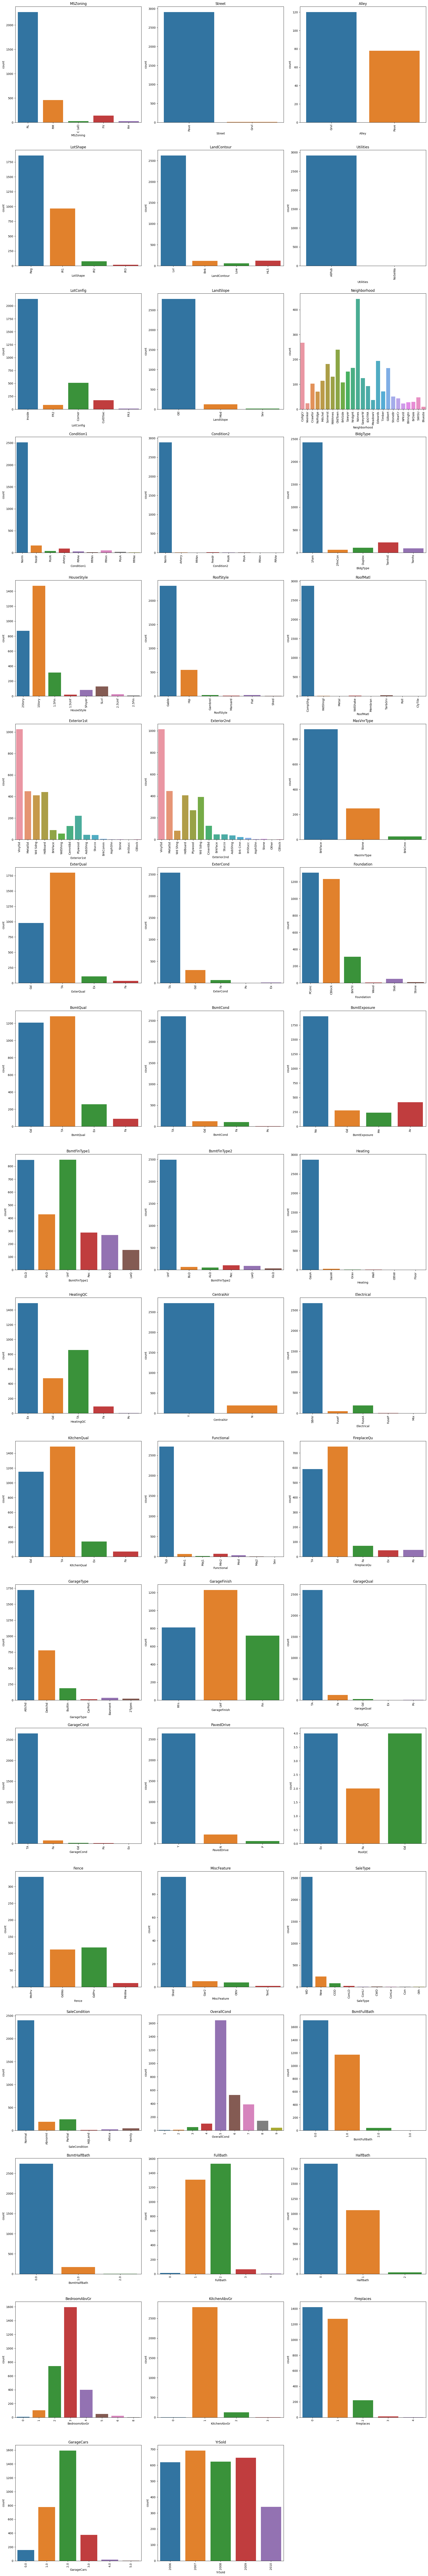

In [10]:
n = len(cat_cols)
rows = (n + 2) // 3  

plt.figure(figsize=(21, rows * 7))  

for i, col in enumerate(cat_cols):
    plt.subplot(rows, 3, i + 1) 
    sns.countplot(x=df[col])
    plt.title(f'{col}')
    plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()  

In [11]:
for i in cat_cols:
    result_df = pd.DataFrame({
        "Mean": df.groupby(i)["SalePrice"].mean(),
        "Count": df.groupby(i)["SalePrice"].count()  
    })
    
    print(result_df)
    print("\n##############################\n")

               Mean  Count
MSZoning                  
C (all)   74528.000     10
FV       214014.062     65
RH       131558.375     16
RL       191004.995   1151
RM       126316.830    218

##############################

             Mean  Count
Street                  
Grvl   130190.500      6
Pave   181130.539   1454

##############################

            Mean  Count
Alley                  
Grvl  122219.080     50
Pave  168000.585     41

##############################

               Mean  Count
LotShape                  
IR1      206101.665    484
IR2      239833.366     41
IR3      216036.500     10
Reg      164754.818    925

##############################

                  Mean  Count
LandContour                  
Bnk         143104.079     63
HLS         231533.940     50
Low         203661.111     36
Lvl         180183.747   1311

##############################

                Mean  Count
Utilities                  
AllPub    180950.957   1459
NoSeWa    137500.000    

# Correlation Analysis

In [12]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", annot_kws={"size": 7})
        plt.show()
    return drop_list

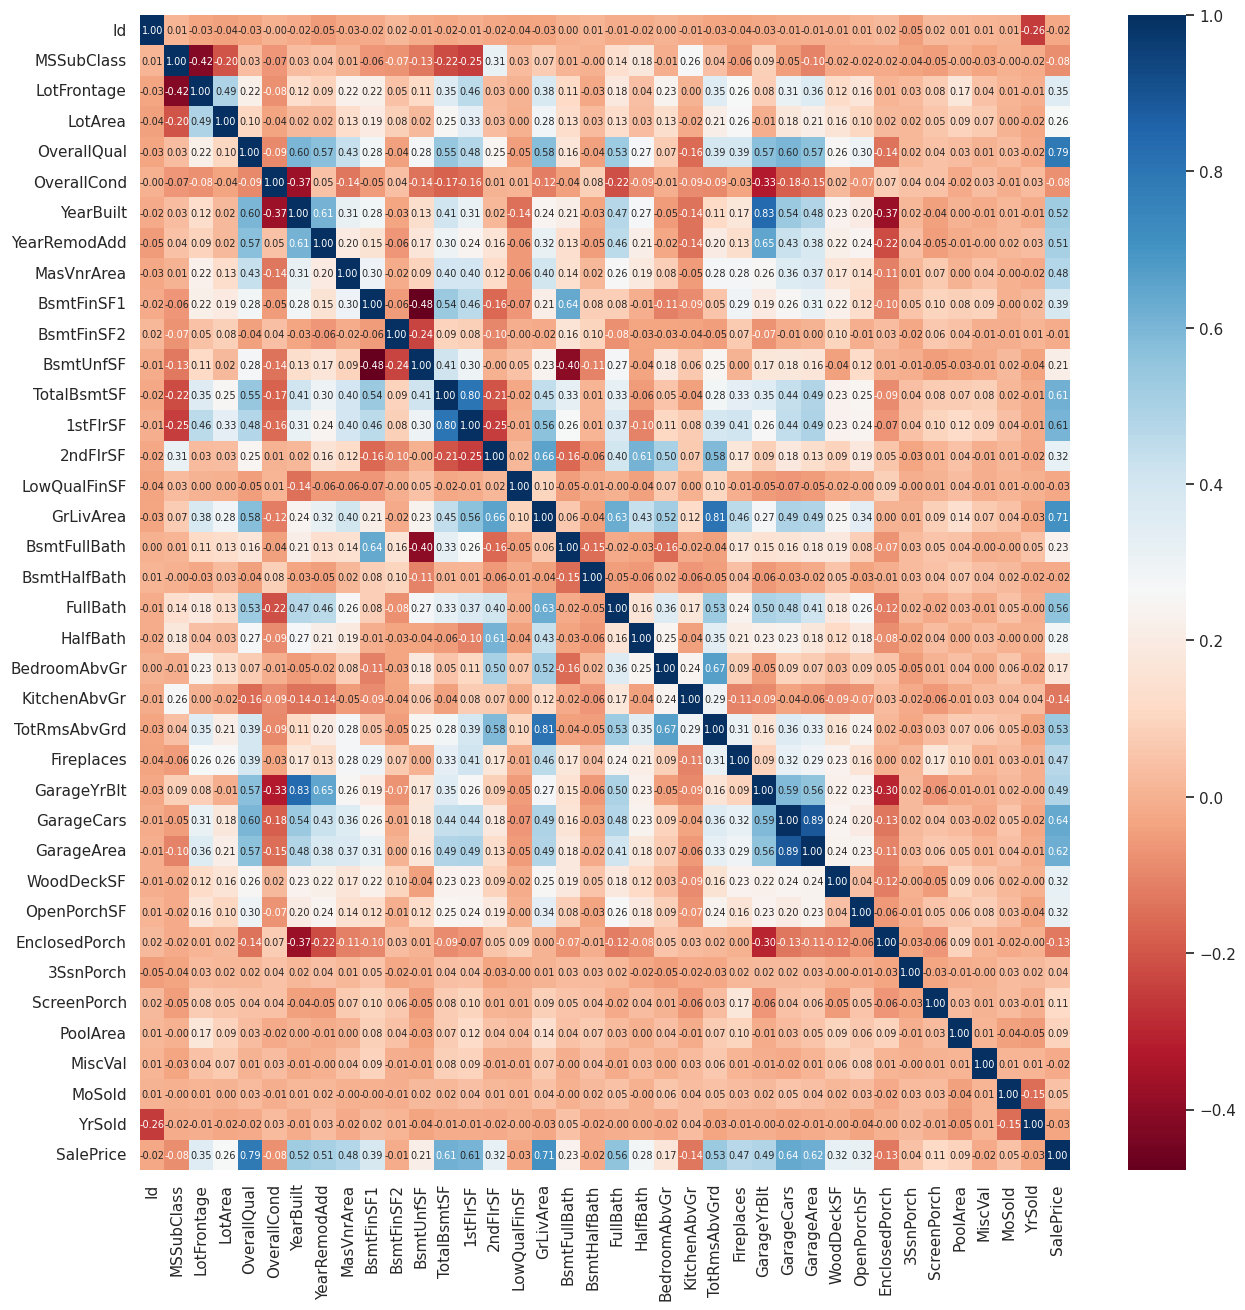

[]

In [13]:
high_correlated_cols(df, plot=True)

# Outlier Analysis

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].shape[0] > 0:
        return True
    else:
        return False

In [15]:
for i in num_cols:
    print(i,check_outlier(df,i))

MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False


In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [17]:
for i in num_cols:
    replace_with_thresholds(df, i)

In [18]:
for i in num_cols:
    print(i,check_outlier(df,i))

MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
MoSold False


# Missing Values Analysis

In [19]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    return na_columns
    

In [20]:
missing_values_table(df)

              n_miss  ratio
PoolQC          2909 99.660
MiscFeature     2814 96.400
Alley           2721 93.220
Fence           2348 80.440
MasVnrType      1766 60.500
SalePrice       1459 49.980
FireplaceQu     1420 48.650
LotFrontage      486 16.650
GarageCond       159  5.450
GarageYrBlt      159  5.450
GarageFinish     159  5.450
GarageQual       159  5.450
GarageType       157  5.380
BsmtExposure      82  2.810
BsmtCond          82  2.810
BsmtQual          81  2.770
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrArea        23  0.790
MSZoning           4  0.140
Functional         2  0.070
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
Utilities          2  0.070
KitchenQual        1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030
Exterior2nd        1  0.030
Exterior1st        1  0.030
SaleType           1  0.030
Electrical         1

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [21]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

for col in no_cols:
    df[col].fillna("No",inplace=True)

In [22]:
for col in cat_cols:    
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
missing_values_table(df)

             n_miss  ratio
SalePrice      1459 49.980
LotFrontage     486 16.650
GarageYrBlt     159  5.450
MasVnrArea       23  0.790
BsmtFinSF1        1  0.030
BsmtFinSF2        1  0.030
BsmtUnfSF         1  0.030
TotalBsmtSF       1  0.030
GarageArea        1  0.030


['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea',
 'SalePrice']

In [24]:
variables_with_na = missing_values_table(df)
variables_with_na = [col for col in variables_with_na if "SalePrice" not in col]
variables_with_na

             n_miss  ratio
SalePrice      1459 49.980
LotFrontage     486 16.650
GarageYrBlt     159  5.450
MasVnrArea       23  0.790
BsmtFinSF1        1  0.030
BsmtFinSF2        1  0.030
BsmtUnfSF         1  0.030
TotalBsmtSF       1  0.030
GarageArea        1  0.030


['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea']

In [25]:
for col in variables_with_na:    
    df[col].fillna(df[col].mean(), inplace=True)
    
missing_values_table(df)

           n_miss  ratio
SalePrice    1459 49.980


['SalePrice']

In [26]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0   1          60       RL       65.000  8450.000   Pave    No      Reg   
1   2          20       RL       80.000  9600.000   Pave    No      Reg   
2   3          60       RL       68.000 11250.000   Pave    No      IR1   
3   4          70       RL       60.000  9550.000   Pave    No      IR1   
4   5          60       RL       84.000 14260.000   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr   856.000   854.000             0   
1    GasA        Ex          Y      SBrkr  1262.000     0.000             0   
2    GasA        Ex          Y      SBrkr   920.000   866.000             0   
3    GasA        Gd          Y      SBrkr   961.000   756.000             0   
4    GasA        Ex          Y      SBrkr  1145.000  1053.000             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1710.000         1.000         0.000         2         1             3   
1   1262.000         0.000         1.000         2         0             3   
2   1786.000         1.000         0.000         2         1             3   
3   1717.000         1.000         0.000         1         0             3   
4   2198.000         1.000         0.000         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd         8.000        Typ           0          No   
1             1          TA         6.000        Typ           1          TA   
2             1          Gd         6.000        Typ           1          TA   
3             1          Gd      

In [27]:
df["NEW_HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["NEW_TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

# Label Encoding

In [28]:
def label_encoder (dataframe, binary_col):
    dataframe[binary_col]=LabelEncoder().fit_transform(dataframe[binary_col])
    return dataframe

binary_cols=[col for col in df.columns if df[col].dtypes == "O" 
             and df[col].nunique()==2]

In [29]:
for col in binary_cols:
    df=label_encoder (df, col)
    
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea  Street Alley LotShape  \
0   1          60       RL       65.000  8450.000       1    No      Reg   
1   2          20       RL       80.000  9600.000       1    No      Reg   
2   3          60       RL       68.000 11250.000       1    No      IR1   
3   4          70       RL       60.000  9550.000       1    No      IR1   
4   5          60       RL       84.000 14260.000       1    No      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          0    Inside       Gtl      CollgCr       Norm   
1         Lvl          0       FR2       Gtl      Veenker      Feedr   
2         Lvl          0    Inside       Gtl      CollgCr       Norm   
3         Lvl          0    Corner       Gtl      Crawfor       Norm   
4         Lvl          0       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex           1      SBrkr   856.000   854.000             0   
1    GasA        Ex           1      SBrkr  1262.000     0.000             0   
2    GasA        Ex           1      SBrkr   920.000   866.000             0   
3    GasA        Gd           1      SBrkr   961.000   756.000             0   
4    GasA        Ex           1      SBrkr  1145.000  1053.000             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1710.000         1.000         0.000         2         1             3   
1   1262.000         0.000         1.000         2         0             3   
2   1786.000         1.000         0.000         2         1             3   
3   1717.000         1.000         0.000         1         0             3   
4   2198.000         1.000         0.000         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd         8.000        Typ           0          No   
1             1          TA         6.000        Typ           1          TA   
2             1          Gd         6.000        Typ           1          TA   
3             1

# One-Hot Encoding

In [30]:
def one_hot_encoder (dataframe, categorical_cols, drop_first=False):
    dataframe=pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [31]:
categorical_cols=[col for col in cat_cols if col not in binary_cols]
df=one_hot_encoder(df, categorical_cols, True)
df=df.apply(lambda x: x.astype(int) if x.dtypes=="bool" else x)
df.head()

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  \
0   1          60       65.000  8450.000       1          0            7   
1   2          20       80.000  9600.000       1          0            6   
2   3          60       68.000 11250.000       1          0            7   
3   4          70       60.000  9550.000       1          0            7   
4   5          60       84.000 14260.000       1          0            8   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       2003      2003.000     196.000     706.000       0.000    150.000   
1       1976      1976.000       0.000     978.000       0.000    284.000   
2       2001      2002.000     162.000     486.000       0.000    434.000   
3       1915      1970.000       0.000     216.000       0.000    540.000   
4       2000      2000.000     350.000     655.000       0.000    490.000   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0      856.000           1   856.000   854.000             0   1710.000   
1     1262.000           1  1262.000     0.000             0   1262.000   
2      920.000           1   920.000   866.000             0   1786.000   
3      756.000           1   961.000   756.000             0   1717.000   
4     1145.000           1  1145.000  1053.000             0   2198.000   

   TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0         8.000     2003.000     548.000           0       61.000   
1         6.000     1976.000     460.000         298        0.000   
2         6.000     2001.000     608.000           0       42.000   
3         7.000     1998.000     642.000           0       35.000   
4         9.000     2000.000     836.000         192       84.000   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0        0.000         0        0   2.000   
1              0          0        0.000         0        0   5.000   
2              0          0        0.000         0        0   9.000   
3            272          0        0.000         0        0   2.000   
4              0          0        0.000         0        0  12.000   

   SalePrice  NEW_HouseAge  NEW_TotalSF  MSZoning_FV  MSZoning_RH  \
0 208500.000             5     2566.000            0            0   
1 181500.000            31     2524.000            0            0   
2 223500.000             7     2706.000            0            0   
3 140000.000            91     2473.000            0            0   
4 250000.000             8     3343.000            0            0   

   MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0         1           0             0             0   
1            1            0         1           0             0             0   
2            1            0         1           0             0             0   
3            1            0         1           0             0             0   
4            1            0         1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  N

# Scale

In [32]:
x=[col for col in num_cols if col != "Id"]
df[x]=RobustScaler().fit_transform(df[x])
df.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
0   1       0.200       -0.235   -0.245       1          0        0.500   
1   2      -0.600        0.598    0.036       1          0        0.000   
2   3       0.200       -0.068    0.439       1          0        0.500   
3   4       0.400       -0.513    0.024       1          0        0.500   
4   5       0.200        0.821    1.175       1          0        1.000   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0      0.632         0.256       1.199       0.460       0.000     -0.542   
1      0.063        -0.436       0.000       0.831       0.000     -0.313   
2      0.589         0.231       0.991       0.160       0.000     -0.056   
3     -1.221        -0.590       0.000      -0.209       0.000      0.125   
4      0.568         0.179       2.141       0.390       0.000      0.039   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0       -0.263           1    -0.442     1.213         0.000      0.431   
1        0.534           1     0.352     0.000         0.000     -0.295   
2       -0.138           1    -0.317     1.230         0.000      0.554   
3       -0.460           1    -0.237     1.074         0.000      0.442   
4        0.305           1     0.123     1.496         0.000      1.221   

   TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1.000        0.631       0.266       0.000        0.500   
1         0.000       -0.053      -0.078       1.774       -0.371   
2         0.000        0.580       0.500       0.000        0.229   
3         0.500        0.504       0.633       0.000        0.129   
4         1.500        0.555       1.391       1.143        0.829   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0          0.000      0.000        0.000     0.000    0.000  -1.000   
1          0.000      0.000        0.000     0.000    0.000  -0.250   
2          0.000      0.000        0.000     0.000    0.000   0.750   
3        272.000      0.000        0.000     0.000    0.000  -1.000   
4          0.000      0.000        0.000     0.000    0.000   1.500   

   SalePrice  NEW_HouseAge  NEW_TotalSF  MSZoning_FV  MSZoning_RH  \
0 208500.000             5     2566.000            0            0   
1 181500.000            31     2524.000            0            0   
2 223500.000             7     2706.000            0            0   
3 140000.000            91     2473.000            0            0   
4 250000.000             8     3343.000            0            0   

   MSZoning_RL  MSZoning_RM  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0         1           0             0             0   
1            1            0         1           0             0             0   
2            1            0         1           0             0             0   
3            1            0         1           0             0             0   
4            1            0         1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighbo

In [33]:
train_df=df[df["SalePrice"].notnull()]
test_df=df[df["SalePrice"].isnull()]
print("Mean: " + str(df["SalePrice"].mean()))
print("Std: " + str(df["SalePrice"].std()))

Mean: 180921.19589041095
Std: 79442.50288288662


# Modelling

In [34]:
y=np.log1p(train_df["SalePrice"])
X=train_df.drop(["Id", "SalePrice"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [35]:
# Linear Regression

reg_model = LinearRegression().fit(X_train,y_train) #built model
reg_pred = reg_model.predict(X_test) #make prediction

print('MAE:', mean_absolute_error(y_test, reg_pred))
print('MSE:', mean_squared_error(y_test, reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, reg_pred)))


MAE: 0.09836054443813035
MSE: 0.030503164155227573
RMSE: 0.1746515506808559


In [36]:
liner_r2_score=r2_score(y_test, reg_pred)
liner_r2_score

0.8201930240234747

In [37]:
# CatBoost Regressor

cb_model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test) 

print('MAE:', mean_absolute_error(y_test, preds))
print('MSE:', mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

MAE: 0.08361630546374758
MSE: 0.016312838821985018
RMSE: 0.1277217241583632


In [38]:
cb_r2_score=r2_score(y_test, preds)
cb_r2_score

0.9038407227772497

# Hyperparameter Optimization

In [39]:
cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cb_params = {"iterations": [300, 350],
                   "learning_rate": [0.1, 0.2],
                   "depth": [3, 5]}
cb_random = GridSearchCV(estimator=cb,param_grid=cb_params, n_jobs=-1)

cb_random.fit(X_train, y_train)

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7861774416c0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5], 'iterations': [300, 350],
                         'learning_rate': [0.1, 0.2]})

In [40]:
print(cb_random.best_params_)

final_model = cb.set_params(**cb_random.best_params_, random_state=17).fit(X_train, y_train)

{'depth': 5, 'iterations': 300, 'learning_rate': 0.1}


In [41]:
cat_pred = final_model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, cat_pred))
print('MSE:', mean_squared_error(y_test, cat_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, cat_pred)))
print('r2_score:', r2_score(y_test, cat_pred))

MAE: 0.08607823685406854
MSE: 0.016947999309457618
RMSE: 0.13018448183043022
r2_score: 0.9000966427883331


In [42]:
cb_r2_score=r2_score(y_test, preds)
cb_r2_score

0.9038407227772497

# Feature Importance

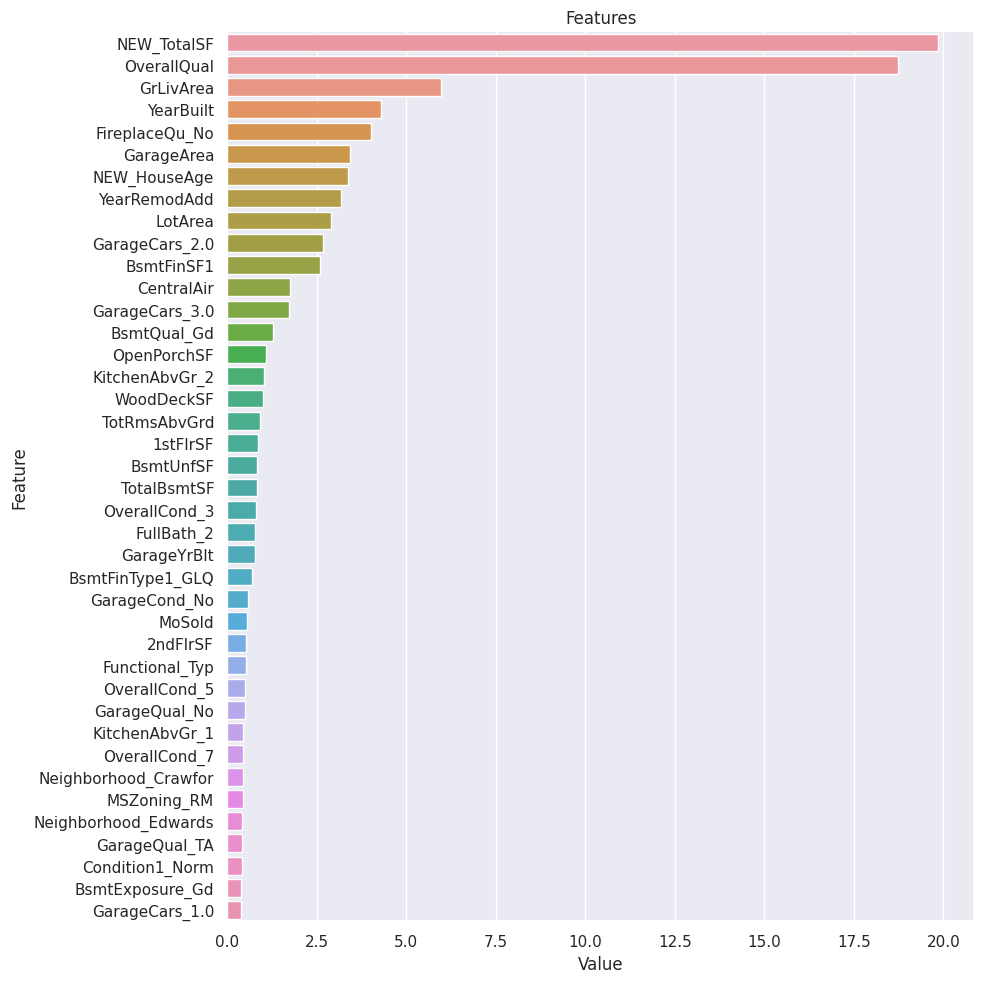

In [43]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:40])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(final_model, X, df)

In [44]:
prediction = final_model.predict(test_df.drop(columns=["Id", "SalePrice"]))

submission_df=pd.DataFrame({"Id": test_df["Id"], "SalePrice":prediction})
submission_df["Id"]=submission_df["Id"].astype(int)

submission_df.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' has been saved.")

Submission file 'submission.csv' has been saved.
